# OA HW3: Aspen Morgan

Time: 6

## Problem 1

In [2]:
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
# create autocorrelated timeseries
N = 5000
a1, a2, a3, a4 = 0, 0.25, 0.5, 0.92 # given a
b1, b2, b3, b4 = np.sqrt(1.-a1**2), np.sqrt(1.-a2**2), np.sqrt(1.-a3**2), np.sqrt(1.-a4**2) # get b (assume standardized)
T1, T2, T3, T4 = [np.random.normal()], [np.random.normal()], [np.random.normal()], [np.random.normal()] # initialize randomly
for i in range(N-1):
    T1.append(a1*T1[i] + b1*np.random.normal()) # today is like yesterday plus noise
    T2.append(a2*T2[i] + b2*np.random.normal())
    T3.append(a3*T3[i] + b3*np.random.normal())
    T4.append(a4*T4[i] + b4*np.random.normal())

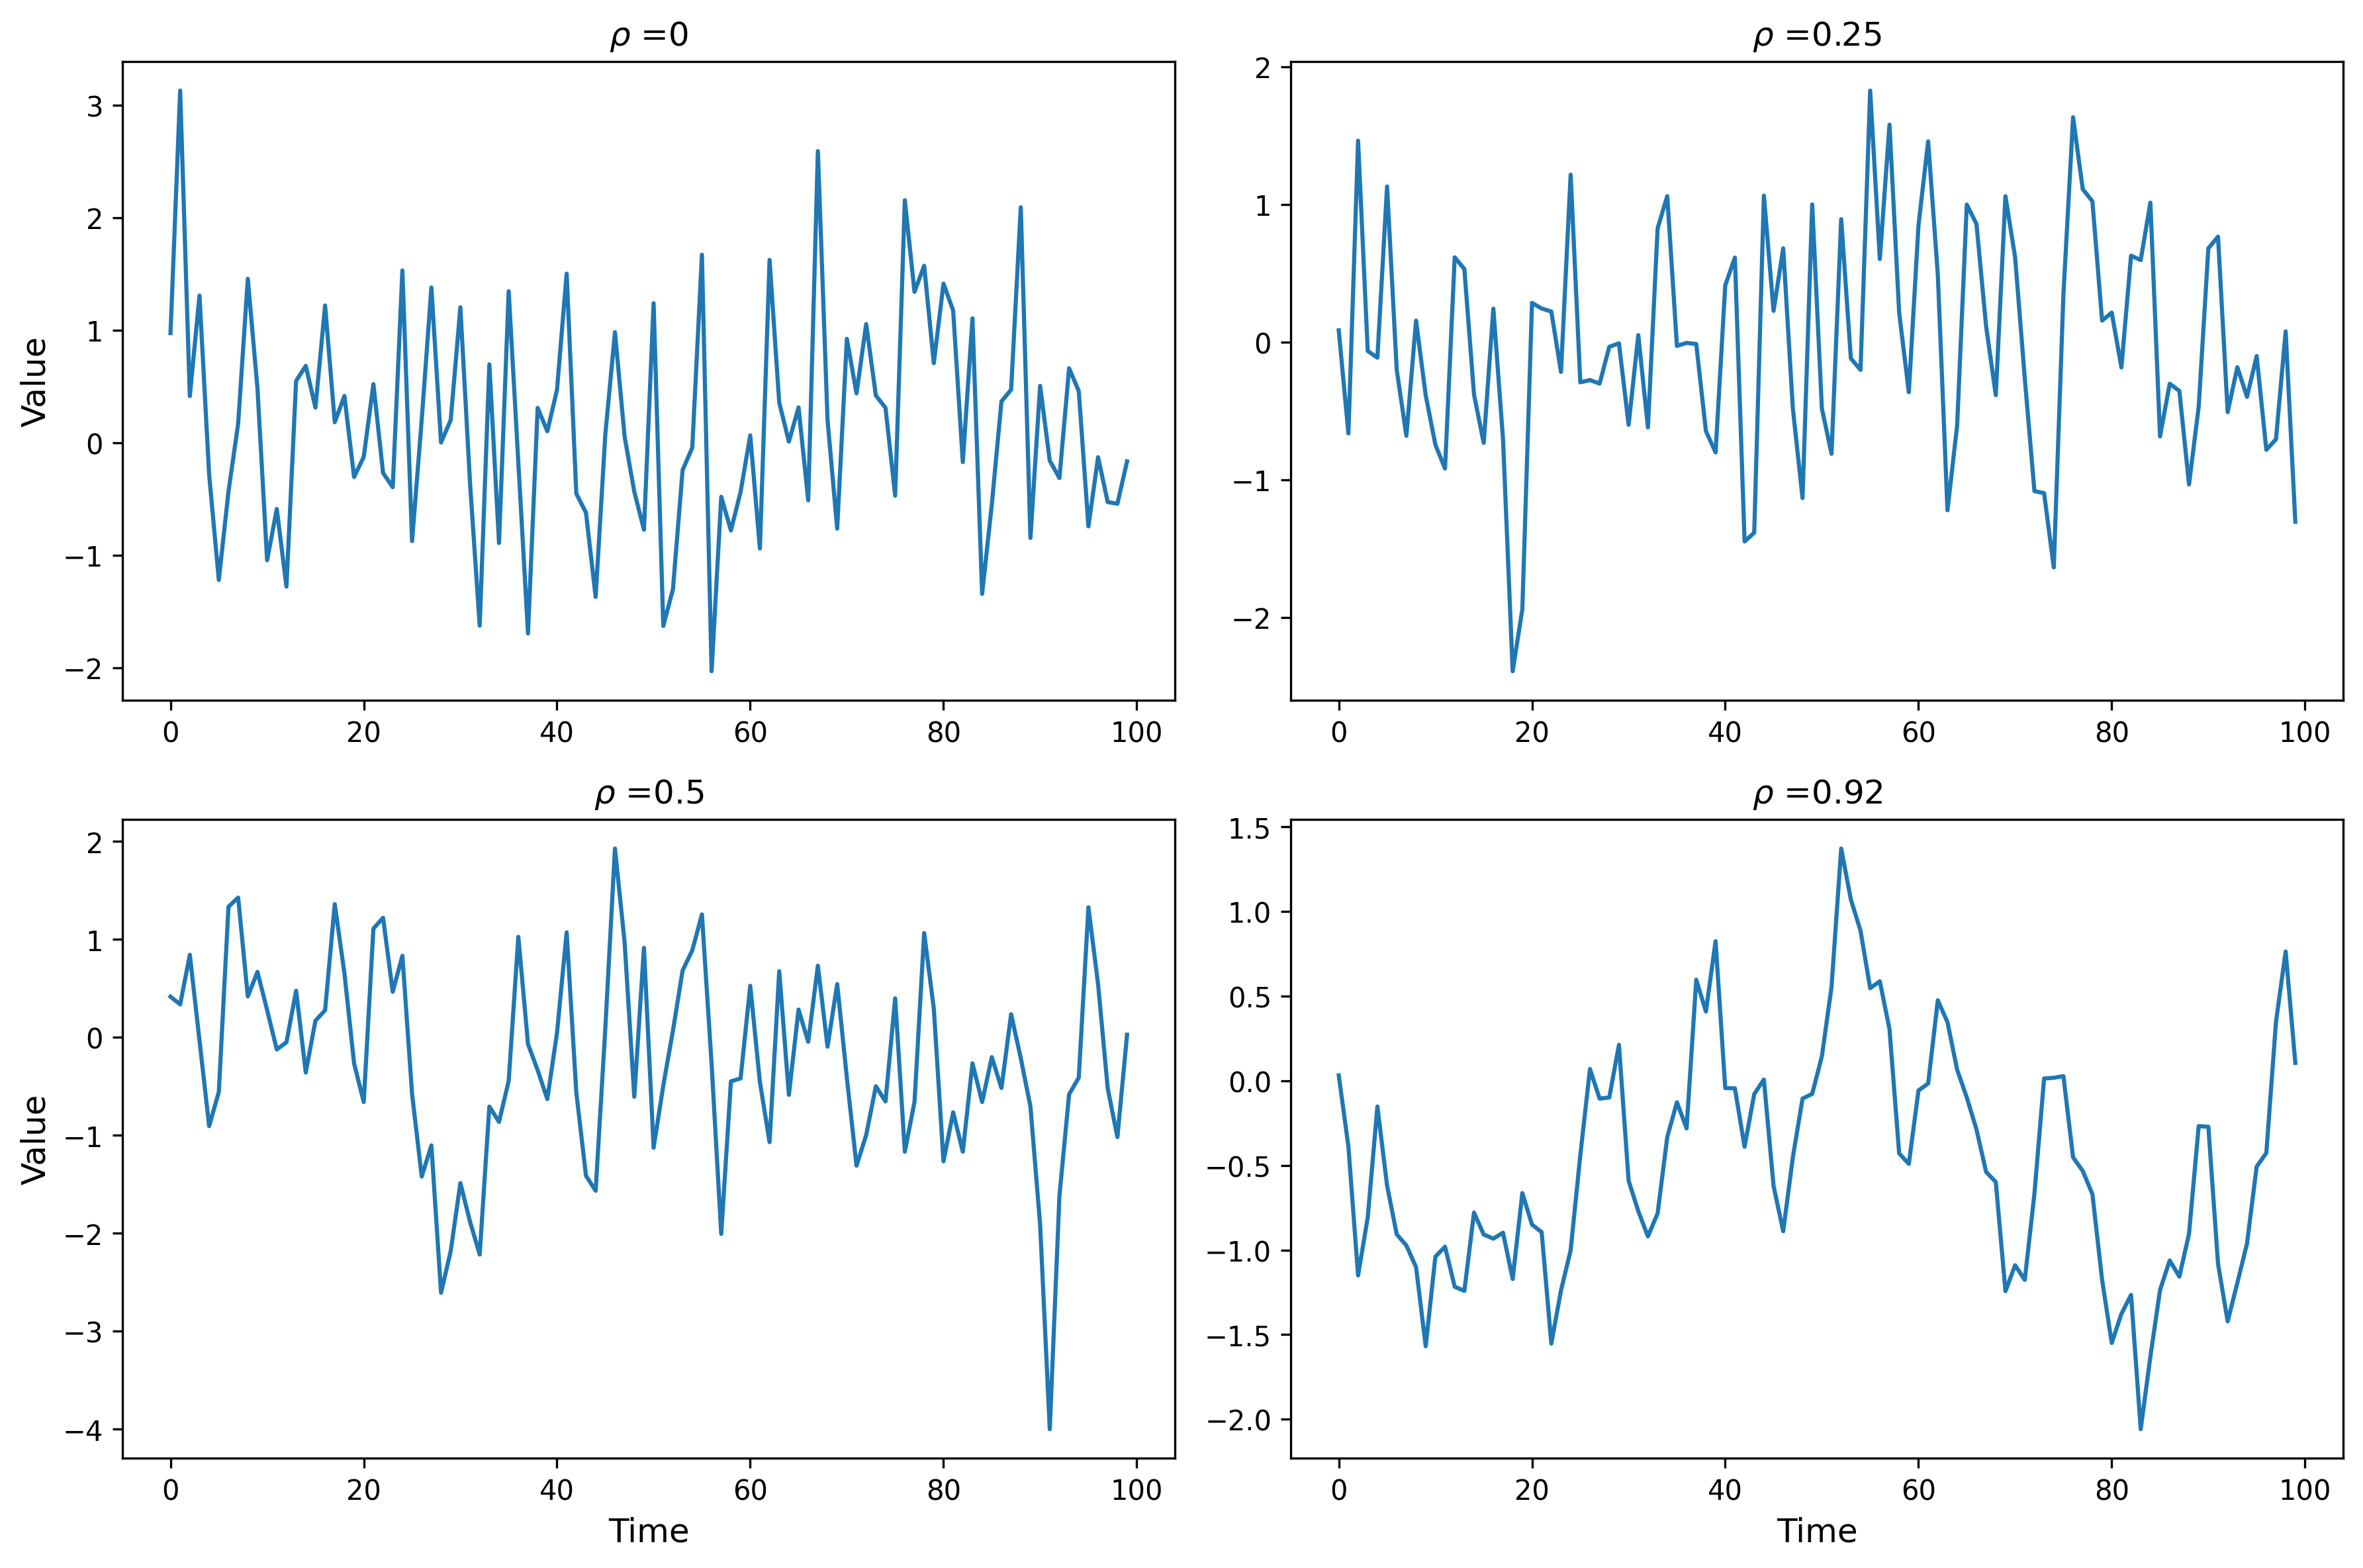

In [4]:
# plot
fig, ax = plt.subplots(2, 2, figsize=(12, 8),  dpi=300) # dpi=300
ax[0][0].plot(np.arange(100), T1[:100], label="T1")
ax[0][0].set_title("$\\rho$ =0", fontsize=12)
# ax[0][0].set_xlabel("Time")
ax[0][0].set_ylabel("Value",fontsize=12)
ax[0][1].plot(np.arange(100), T2[:100], label="T2")
ax[0][1].set_title("$\\rho$ =0.25",fontsize=12)
# ax[0][1].set_xlabel("Time")
# ax[0][1].set_ylabel("Value")
ax[1][0].plot(np.arange(100), T3[:100], label="T3")
ax[1][0].set_title("$\\rho$ =0.5",fontsize=12)
ax[1][0].set_xlabel("Time",fontsize=12)
ax[1][0].set_ylabel("Value",fontsize=12)
ax[1][1].plot(np.arange(100), T4[:100], label="T4")
ax[1][1].set_title("$\\rho$ =0.92",fontsize=12)
ax[1][1].set_xlabel("Time",fontsize=12)
# ax[1][1].set_ylabel("Value")
# plt.suptitle("Autocorrelated Timeseries", fontsize=16)
plt.tight_layout()
plt.show();
fig.savefig('fig1.png')

### (a)

In [5]:
T1_sms, T2_sms, T3_sms, T4_sms = np.empty(100_000), np.empty(100_000), np.empty(100_000), np.empty(100_000)
T1_ssds, T2_ssds, T3_ssds, T4_ssds = np.empty(100_000), np.empty(100_000), np.empty(100_000), np.empty(100_000)

experiments = np.arange(100_000)
for i in experiments:

  # draw 100 random, consecutive samples from each time series
  s = 100
  sample_ind1 = np.random.choice(np.arange(len(T1)))
  sample_ind2 = np.random.choice(np.arange(len(T2)))
  sample_ind3 = np.random.choice(np.arange(len(T3)))
  sample_ind4 = np.random.choice(np.arange(len(T4)))

  while sample_ind1 + s >= len(T1): # keep drawing if it exceeds length of time series
    sample_ind1 = np.random.choice(np.arange(len(T1)))
  while sample_ind2 + s >= len(T2):
    sample_ind2 = np.random.choice(np.arange(len(T2)))
  while sample_ind3 + s>= len(T3):
    sample_ind3 = np.random.choice(np.arange(len(T3)))
  while sample_ind4 + s >= len(T4):
    sample_ind4 = np.random.choice(np.arange(len(T4)))

  samples1 = T1[sample_ind1:(sample_ind1+s)]
  samples2 = T2[sample_ind2:(sample_ind2+s)]
  samples3 = T3[sample_ind3:(sample_ind3+s)]
  samples4 = T4[sample_ind4:(sample_ind4+s)]

  # calculate sample means and sample standard deviations
  T1_sms[i] = np.mean(samples1)
  T2_sms[i] = np.mean(samples2)
  T3_sms[i] = np.mean(samples3)
  T4_sms[i] = np.mean(samples4)

  T1_ssds[i] = np.std(samples1, ddof=1)
  T2_ssds[i] = np.std(samples2, ddof=1)
  T3_ssds[i] = np.std(samples3, ddof=1)
  T4_ssds[i] = np.std(samples4, ddof=1)

In [6]:
# get histograms
inc = 0.2
T1_sms_bins = np.arange(T1_sms.min(), T1_sms.max(), inc*T1_sms.std())
T2_sms_bins = np.arange(T2_sms.min(), T2_sms.max(), inc*T2_sms.std())
T3_sms_bins = np.arange(T3_sms.min(), T3_sms.max(), inc*T3_sms.std())
T4_sms_bins = np.arange(T4_sms.min(), T4_sms.max(), inc*T4_sms.std())

T1_sms_h = np.histogram(T1_sms, T1_sms_bins)
T2_sms_h = np.histogram(T2_sms, T2_sms_bins)
T3_sms_h = np.histogram(T3_sms, T3_sms_bins)
T4_sms_h = np.histogram(T4_sms, T4_sms_bins)

T1_ssds_bins = np.arange(T1_ssds.min(), T1_ssds.max(), inc*T1_ssds.std())
T2_ssds_bins = np.arange(T2_ssds.min(), T2_ssds.max(), inc*T2_ssds.std())
T3_ssds_bins = np.arange(T3_ssds.min(), T3_ssds.max(), inc*T3_ssds.std())
T4_ssds_bins = np.arange(T4_ssds.min(), T4_ssds.max(), inc*T4_ssds.std())

T1_ssds_h = np.histogram(T1_ssds, T1_ssds_bins)
T2_ssds_h = np.histogram(T2_ssds, T2_ssds_bins)
T3_ssds_h = np.histogram(T3_ssds, T3_ssds_bins)
T4_ssds_h = np.histogram(T4_ssds, T4_ssds_bins)

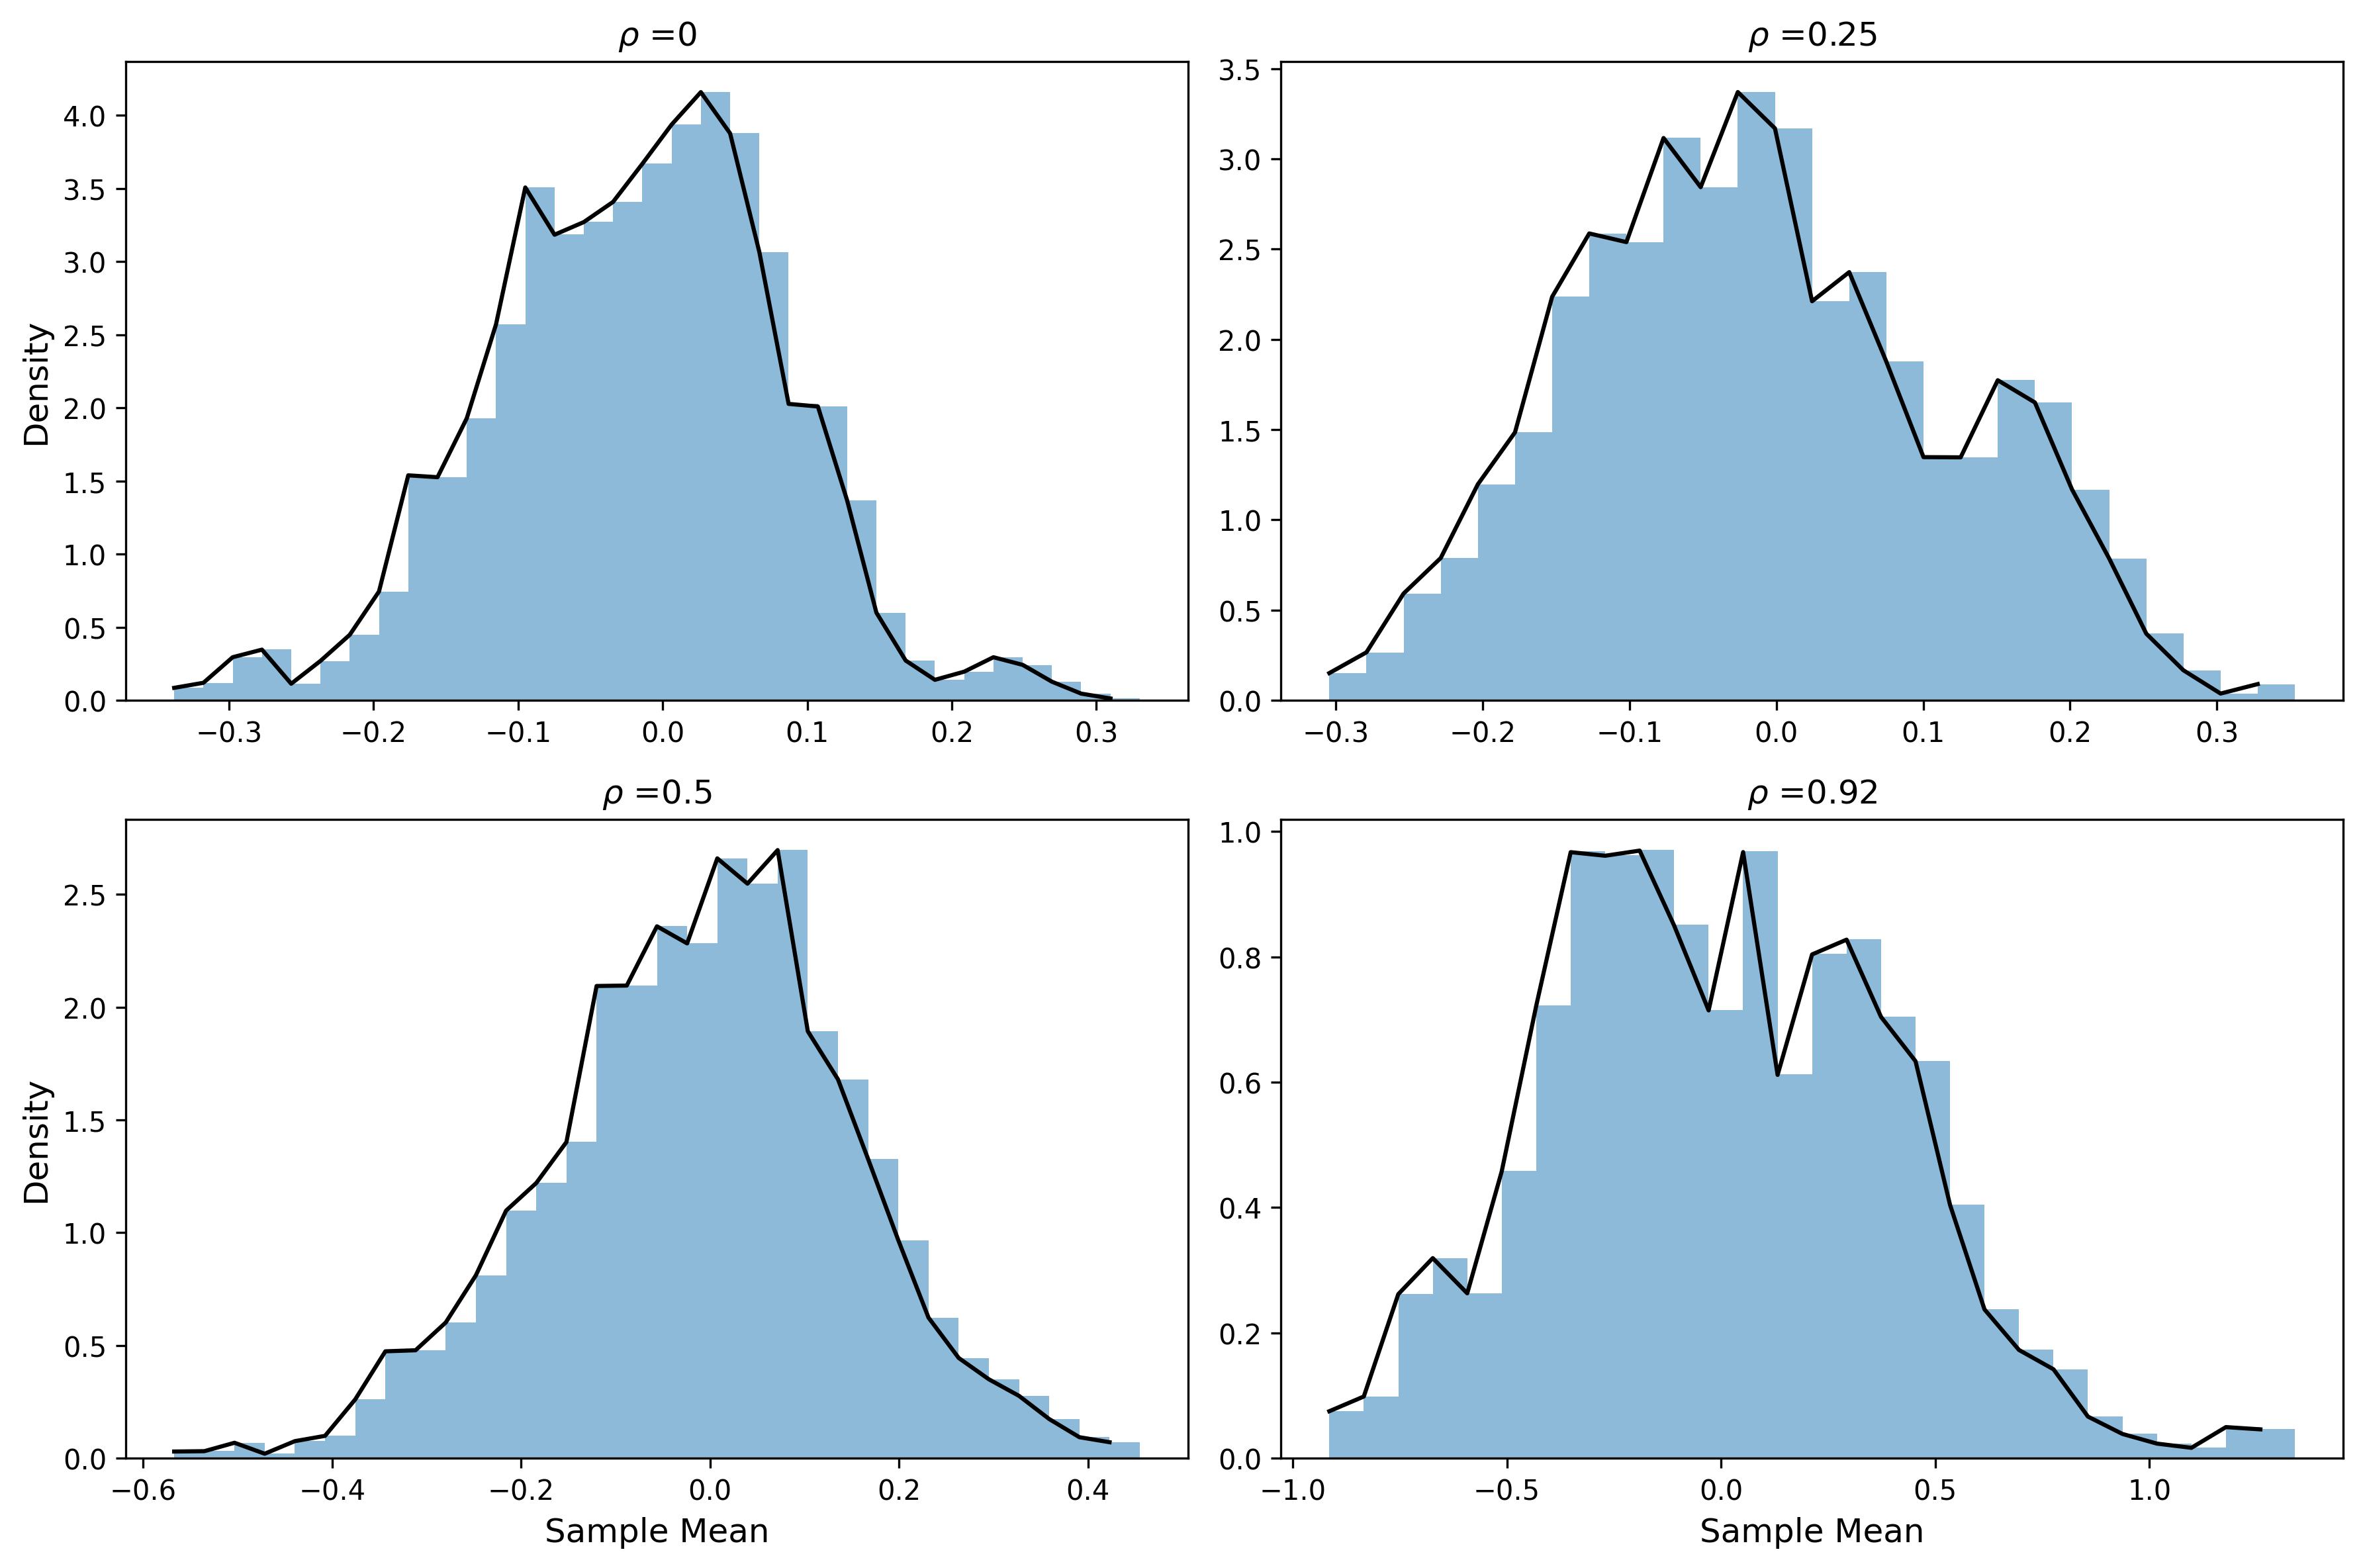

In [7]:
# plot histograms
fig, ax = plt.subplots(2, 2, figsize=(12, 8), dpi=300) # dpi=300
ax[0][0].hist(T1_sms, bins=T1_sms_bins, density=True, alpha=0.5)
ax[0][0].plot(T1_sms_h[1][:-1], T1_sms_h[0].astype(float)/(np.size(T1_sms)*inc*T1_sms.std()), c='k')
ax[0][0].set_title("$\\rho$ =0",fontsize=12)
ax[0][0].set_ylabel("Density",fontsize=12)
ax[0][1].hist(T2_sms, bins=T2_sms_bins, density=True, alpha=0.5)
ax[0][1].plot(T2_sms_h[1][:-1], T2_sms_h[0].astype(float)/(np.size(T2_sms)*inc*T2_sms.std()), c='k')
ax[0][1].set_title("$\\rho$ =0.25",fontsize=12)
ax[1][0].hist(T3_sms, bins=T3_sms_bins, density=True, alpha=0.5)
ax[1][0].plot(T3_sms_h[1][:-1], T3_sms_h[0].astype(float)/(np.size(T3_sms)*inc*T3_sms.std()), c='k')
ax[1][0].set_title("$\\rho$ =0.5",fontsize=12)
ax[1][0].set_xlabel("Sample Mean",fontsize=12)
ax[1][0].set_ylabel("Density",fontsize=12)
ax[1][1].hist(T4_sms, bins=T4_sms_bins, density=True, alpha=0.5)
ax[1][1].plot(T4_sms_h[1][:-1], T4_sms_h[0].astype(float)/(np.size(T4_sms)*inc*T4_sms.std()), c='k')
ax[1][1].set_title("$\\rho$ =0.92",fontsize=12)
ax[1][1].set_xlabel("Sample Mean",fontsize=12)
# plt.suptitle("Consecutive Sample Mean Distributions (100,000 experiments)", fontsize=16)
plt.tight_layout()
plt.show();
fig.savefig('fig2.png')

In [8]:
stats.skew(T1_sms, bias=True)

-0.11283504755906339

In [9]:
stats.skew(T2_sms, bias=True)

0.2029905244117343

In [10]:
stats.skew(T3_sms, bias=True)

-0.18421334530452543

In [11]:
stats.skew(T4_sms, bias=True)

0.2824156583597167

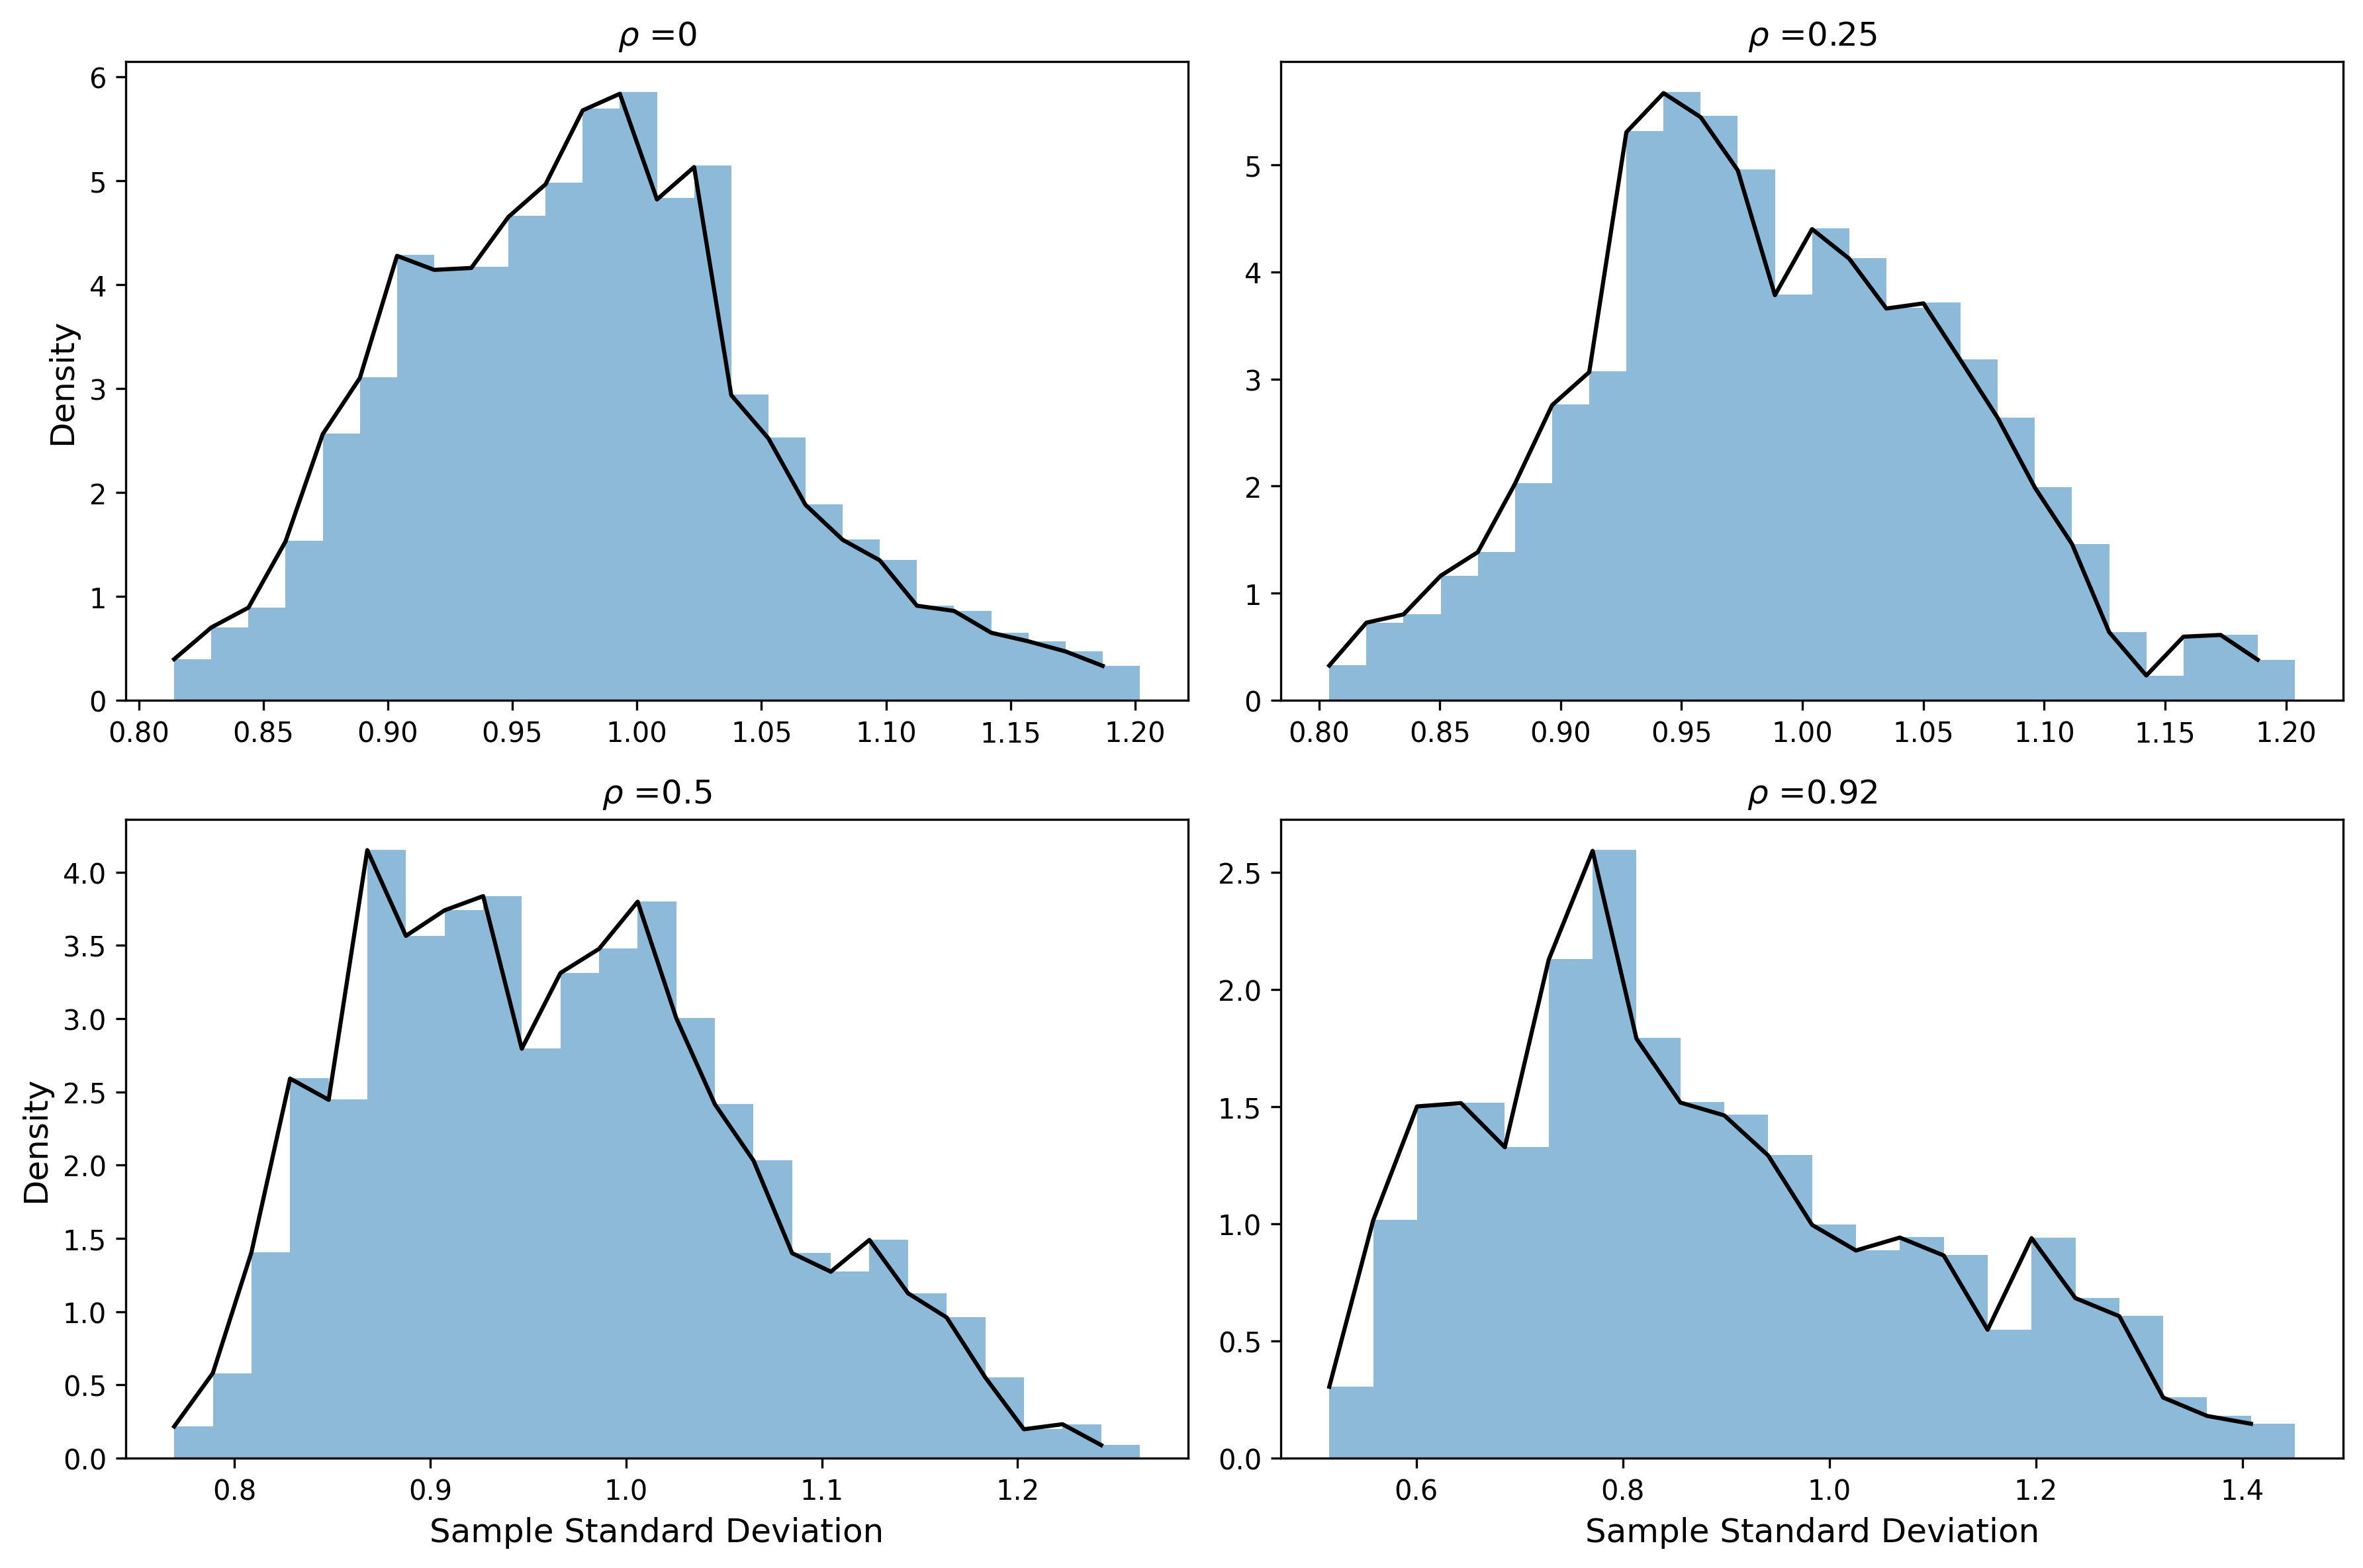

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), dpi=300) # dpi=300
ax[0][0].hist(T1_ssds, bins=T1_ssds_bins, density=True, alpha=0.5)
ax[0][0].plot(T1_ssds_h[1][:-1], T1_ssds_h[0].astype(float)/(np.size(T1_ssds)*inc*T1_ssds.std()), c='k')
ax[0][0].set_title("$\\rho$ =0",fontsize=12)
ax[0][0].set_ylabel("Density",fontsize=12)
ax[0][1].hist(T2_ssds, bins=T2_ssds_bins, density=True, alpha=0.5)
ax[0][1].plot(T2_ssds_h[1][:-1], T2_ssds_h[0].astype(float)/(np.size(T2_ssds)*inc*T2_ssds.std()), c='k')
ax[0][1].set_title("$\\rho$ =0.25",fontsize=12)
ax[1][0].hist(T3_ssds, bins=T3_ssds_bins, density=True, alpha=0.5)
ax[1][0].plot(T3_ssds_h[1][:-1], T3_ssds_h[0].astype(float)/(np.size(T3_ssds)*inc*T3_ssds.std()), c='k')
ax[1][0].set_title("$\\rho$ =0.5",fontsize=12)
ax[1][0].set_xlabel("Sample Standard Deviation",fontsize=12)
ax[1][0].set_ylabel("Density",fontsize=12)
ax[1][1].hist(T4_ssds, bins=T4_ssds_bins, density=True, alpha=0.5)
ax[1][1].plot(T4_ssds_h[1][:-1], T4_ssds_h[0].astype(float)/(np.size(T4_ssds)*inc*T4_ssds.std()), c='k')
ax[1][1].set_title("$\\rho$ =0.92",fontsize=12)
ax[1][1].set_xlabel("Sample Standard Deviation",fontsize=12)
# plt.suptitle("Consecutive Sample Standard Deviation Distributions (100,000 experiments)", fontsize=16)
plt.tight_layout()
plt.show();
fig.savefig('fig3.png')

In [13]:
stats.skew(T1_ssds)

0.3753614623584936

In [14]:
stats.skew(T2_ssds)

0.20876989388892192

In [15]:
stats.skew(T3_ssds)

0.3892725801718532

In [16]:
stats.skew(T4_ssds)

0.527303343398428

### (b)

Figure 1 displays the first 100 time increments of the autocorrelated time series. When the autocorrelation is zero, the series has no memory and is all gaussian noise. As the autocorrelation increases, the length of positive or negative runs increase (width of spikes). The positive/negative runs are very long for an autocorrelation of 0.92 because the series is mostly driven by memory rather than gaussian noise.

Figure 2 and Figure 3 display the sample mean and sample standard deviation distributions of the four, autocorrelated time series. The sample mean distributions are clustered around zero as expected from standardization and are semi-normal as expected from the central limit theorem.

The sample standard deviation distributions are less normal as the central limit theorem does not apply to standard deviation. The sample standard deviation distributions for $\rho=0$ and $\rho=0.25$ are clustered around one as expected from standardization, but the sample standard deviation distribution for $\rho=0.92$ is more skewed and has a mean of 0.86. Based on this figure, it appears that autocorrelation has a impact on the sample standard deviation of a timeseries.


### (c)

In problem 1c of Homework 2, I should have checked for memory in the time series before using statistical methods. If there was autocorrelation, as is the case, I could do a hypothesis test using the effective sample size in place of the given sample size. I also should have sampled consecutive values during bootstrapping.

### (d)

In [17]:
r = pd.read_csv('/content/drive/MyDrive/Classes/OA/HW2/homework_2_data_R.csv').values.flatten()
p = pd.read_csv('/content/drive/MyDrive/Classes/OA/HW2/homework_2_data_P.csv').values.flatten()
data = pd.DataFrame({'R': r, 'P': p})
p2 = data[data.R > 0].P

In [18]:
# # test autocorrelation
# auto = sm.tsa.acf(p)
# r = auto[1]
# r

# # determine e folding time and effective sample size
# Te = -1/np.log(r)
# print(Te)
# N_star = len(p)/(2*Te)
# N_star

In [19]:
# for p2
auto = sm.tsa.acf(p2)
r = auto[1]
r

# determine e folding time and effective sample size
Te = -1/np.log(r)
print(Te)
N_star = len(p2)/(2*Te)
N_star

6.37737111102732


30.106449296639887

In [20]:
# use effective sample size for z test
sigma = p.std()
z = (p2.mean()-p.mean())/(sigma/np.sqrt(N_star))
2*(1-stats.norm.cdf(z))

0.49536852968099687

In [21]:
# bootstrapping consecutive values
cumsum = 0
s = len(p2)
sample_means = 0.0*np.zeros(100_000)
for i in range(100_000):
  sample = np.random.choice(np.arange(len(p)))
  while sample + s >= len(p):
    sample = np.random.choice(np.arange(len(p)))
  sample_means[i] = p[sample:sample+s].mean()
  if  sample_means[i] > p2.mean():
    cumsum += 1
cumsum/100_000

0.4517

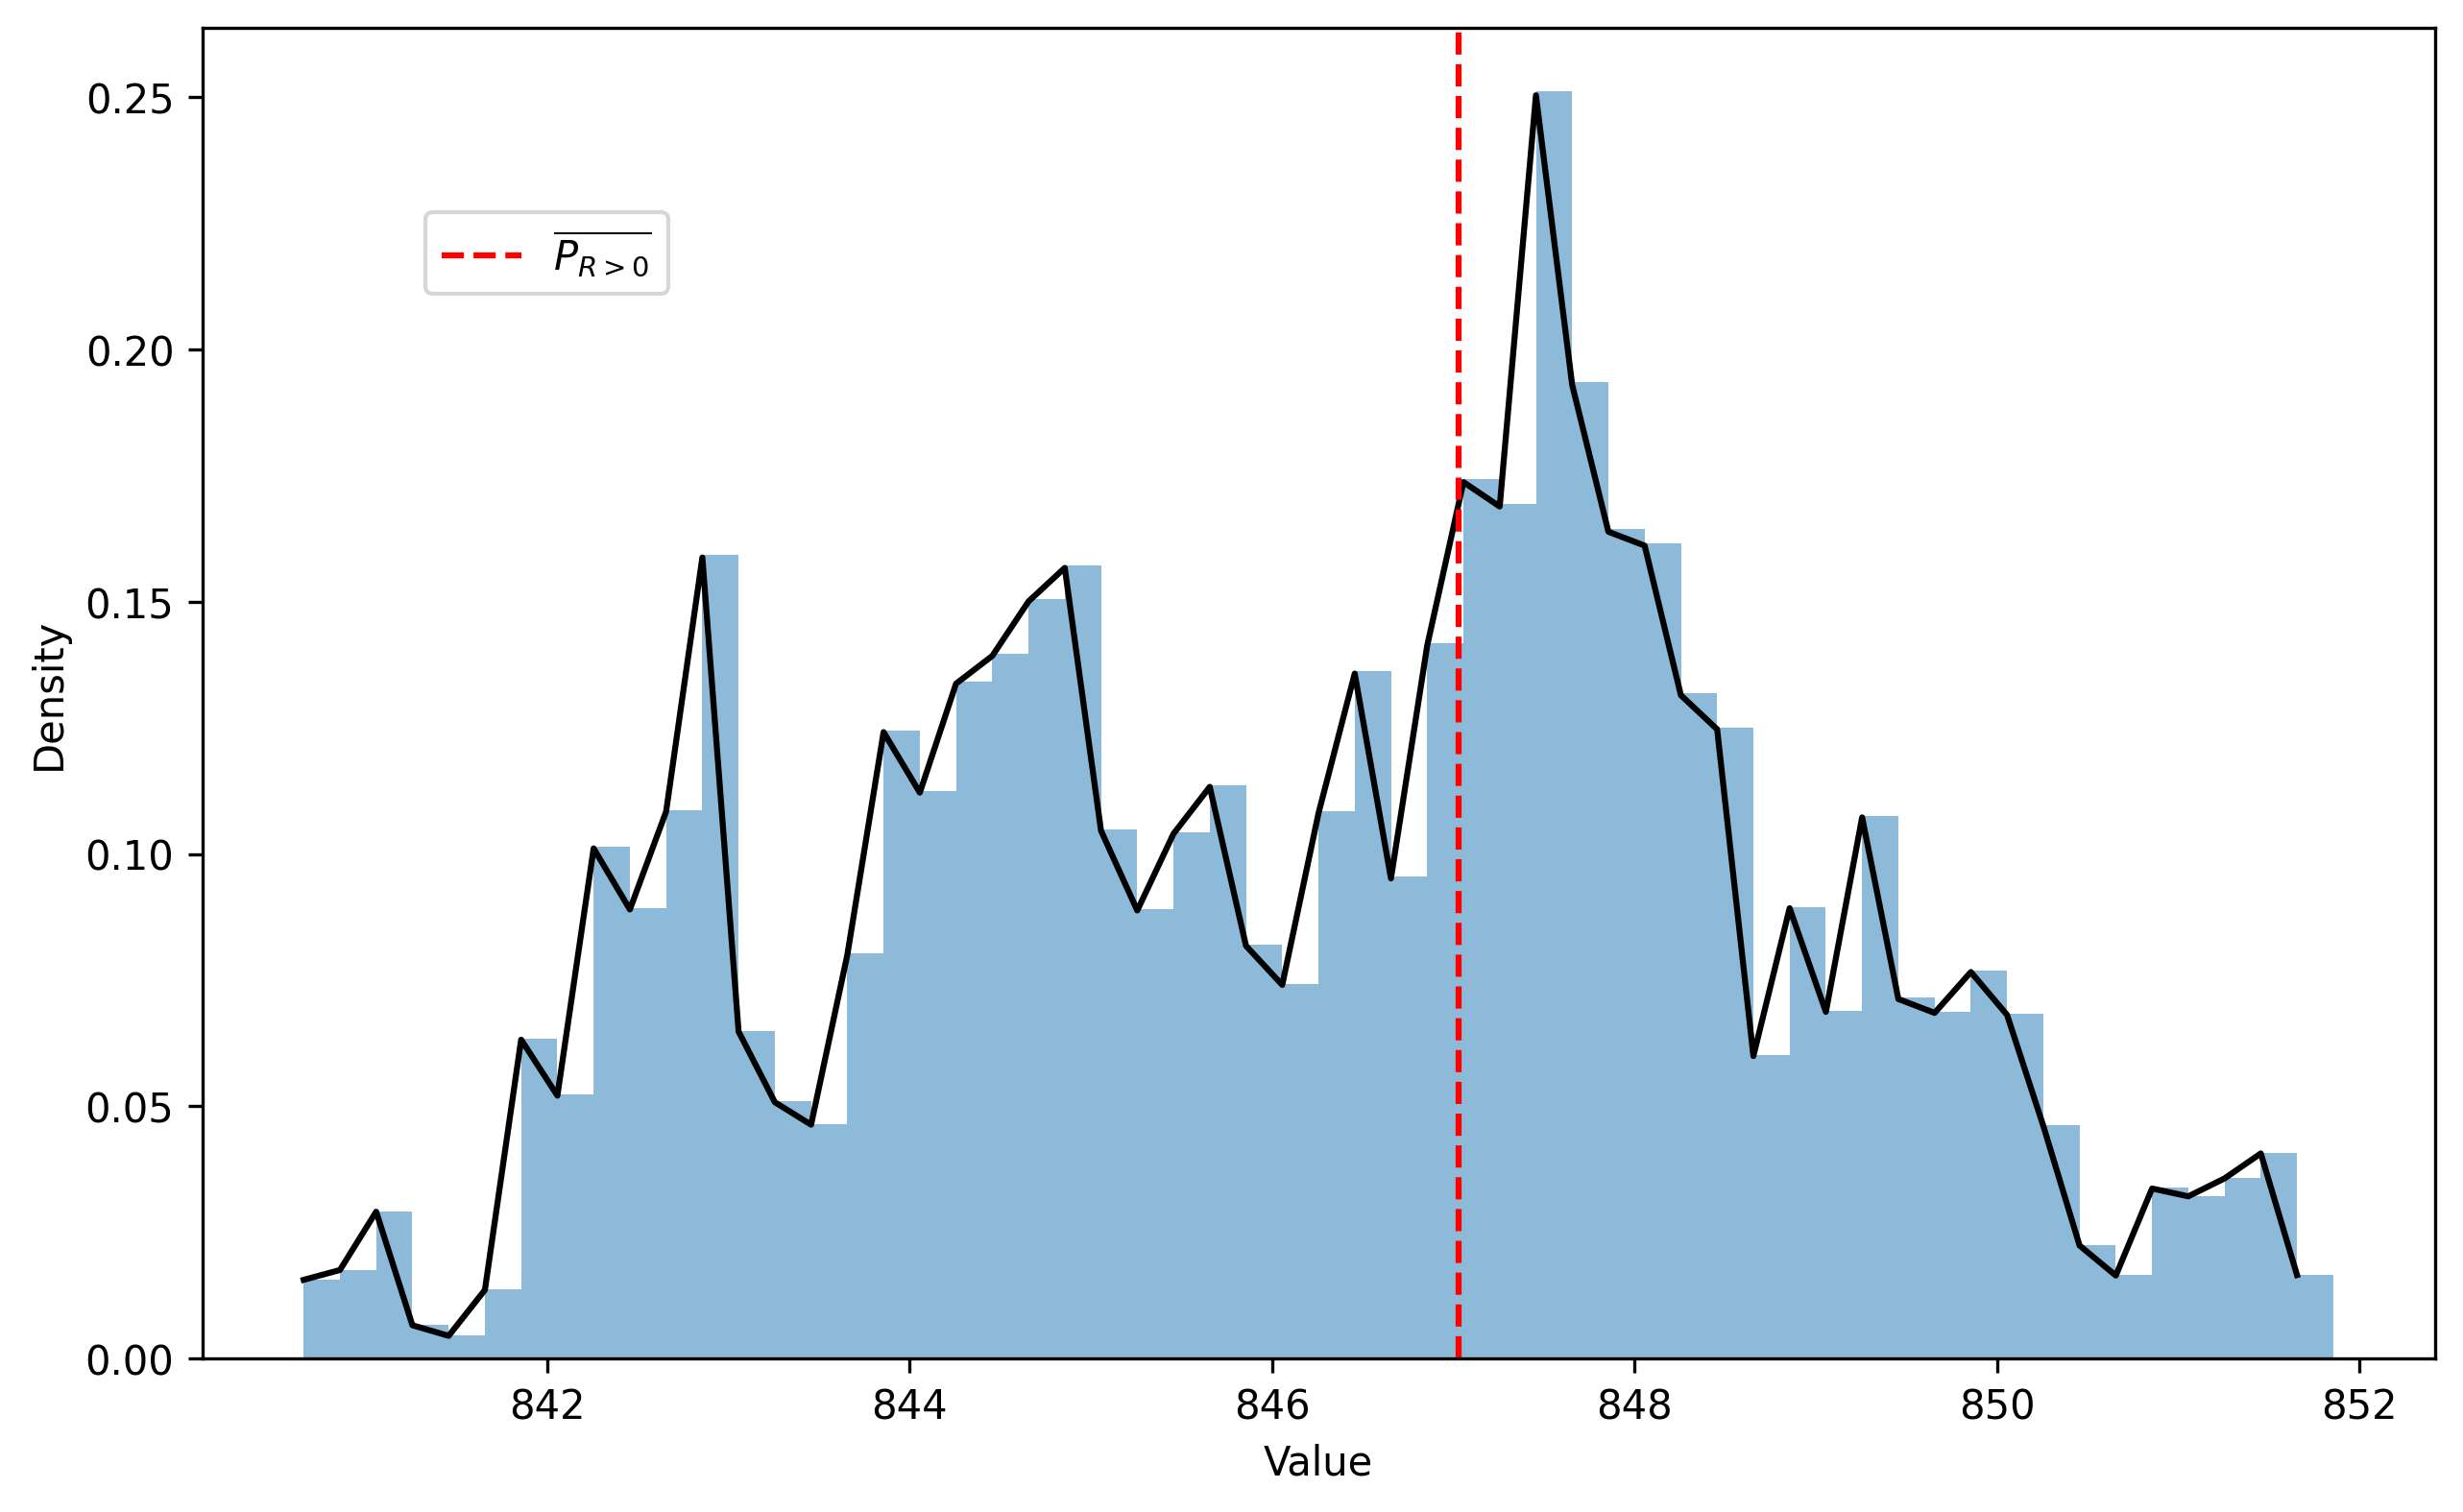

In [22]:
# plot
# create histogram
hist = np.histogram(sample_means, np.arange(sample_means.min(), sample_means.max(), 0.2))

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=300)
ax.hist(sample_means, bins=hist[1], density=True, alpha=0.5)
ax.plot(hist[1][:-1], (hist[0])/(len(sample_means)*0.2), 'k')
ax.axvline(p2.mean(), linestyle='--', color='r', label='$\overline{P_{R>0}}$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc=(0.1, 0.8));
# plt.title('Distribution of consecutive surface pressure sample means');
fig.savefig('fig4.png')

Yes, my conclusions change after accounting for memory in the pressure time series. I calculated a $/rho=0.99$ and an effective sample size of $N^*=19$ using the Leith (1973) method. Now using the effective sample size, I recalculated the two-tailed z-score hypothesis test for earning a mean pressure of 847.03 hPa or greater. (Recall, the 847.03 hPa was the mean pressure during precipiation events and was compared to the overall mean in precipitation of 846.33 hPa.) This time, the probability of the null hypothesis generating the 847.02 hPa was 59 percent! Therefore, I cannot reject the null hypothesis.

I also redid the bootstrapping using consecutive values. I used the same number of experiments (100,000) and the same sample size (384) from the number of pressure values during precipitation events. This time, I generated Figure 4. Figure 4 shows that the mean during precipitation events is not rare at all. And during bootstrapping, the sample mean exceeded 847.03 hPa 45 percent of the time. Again, I cannot reject the null hypothesis now that I've accounted for memory.

## Problem 3

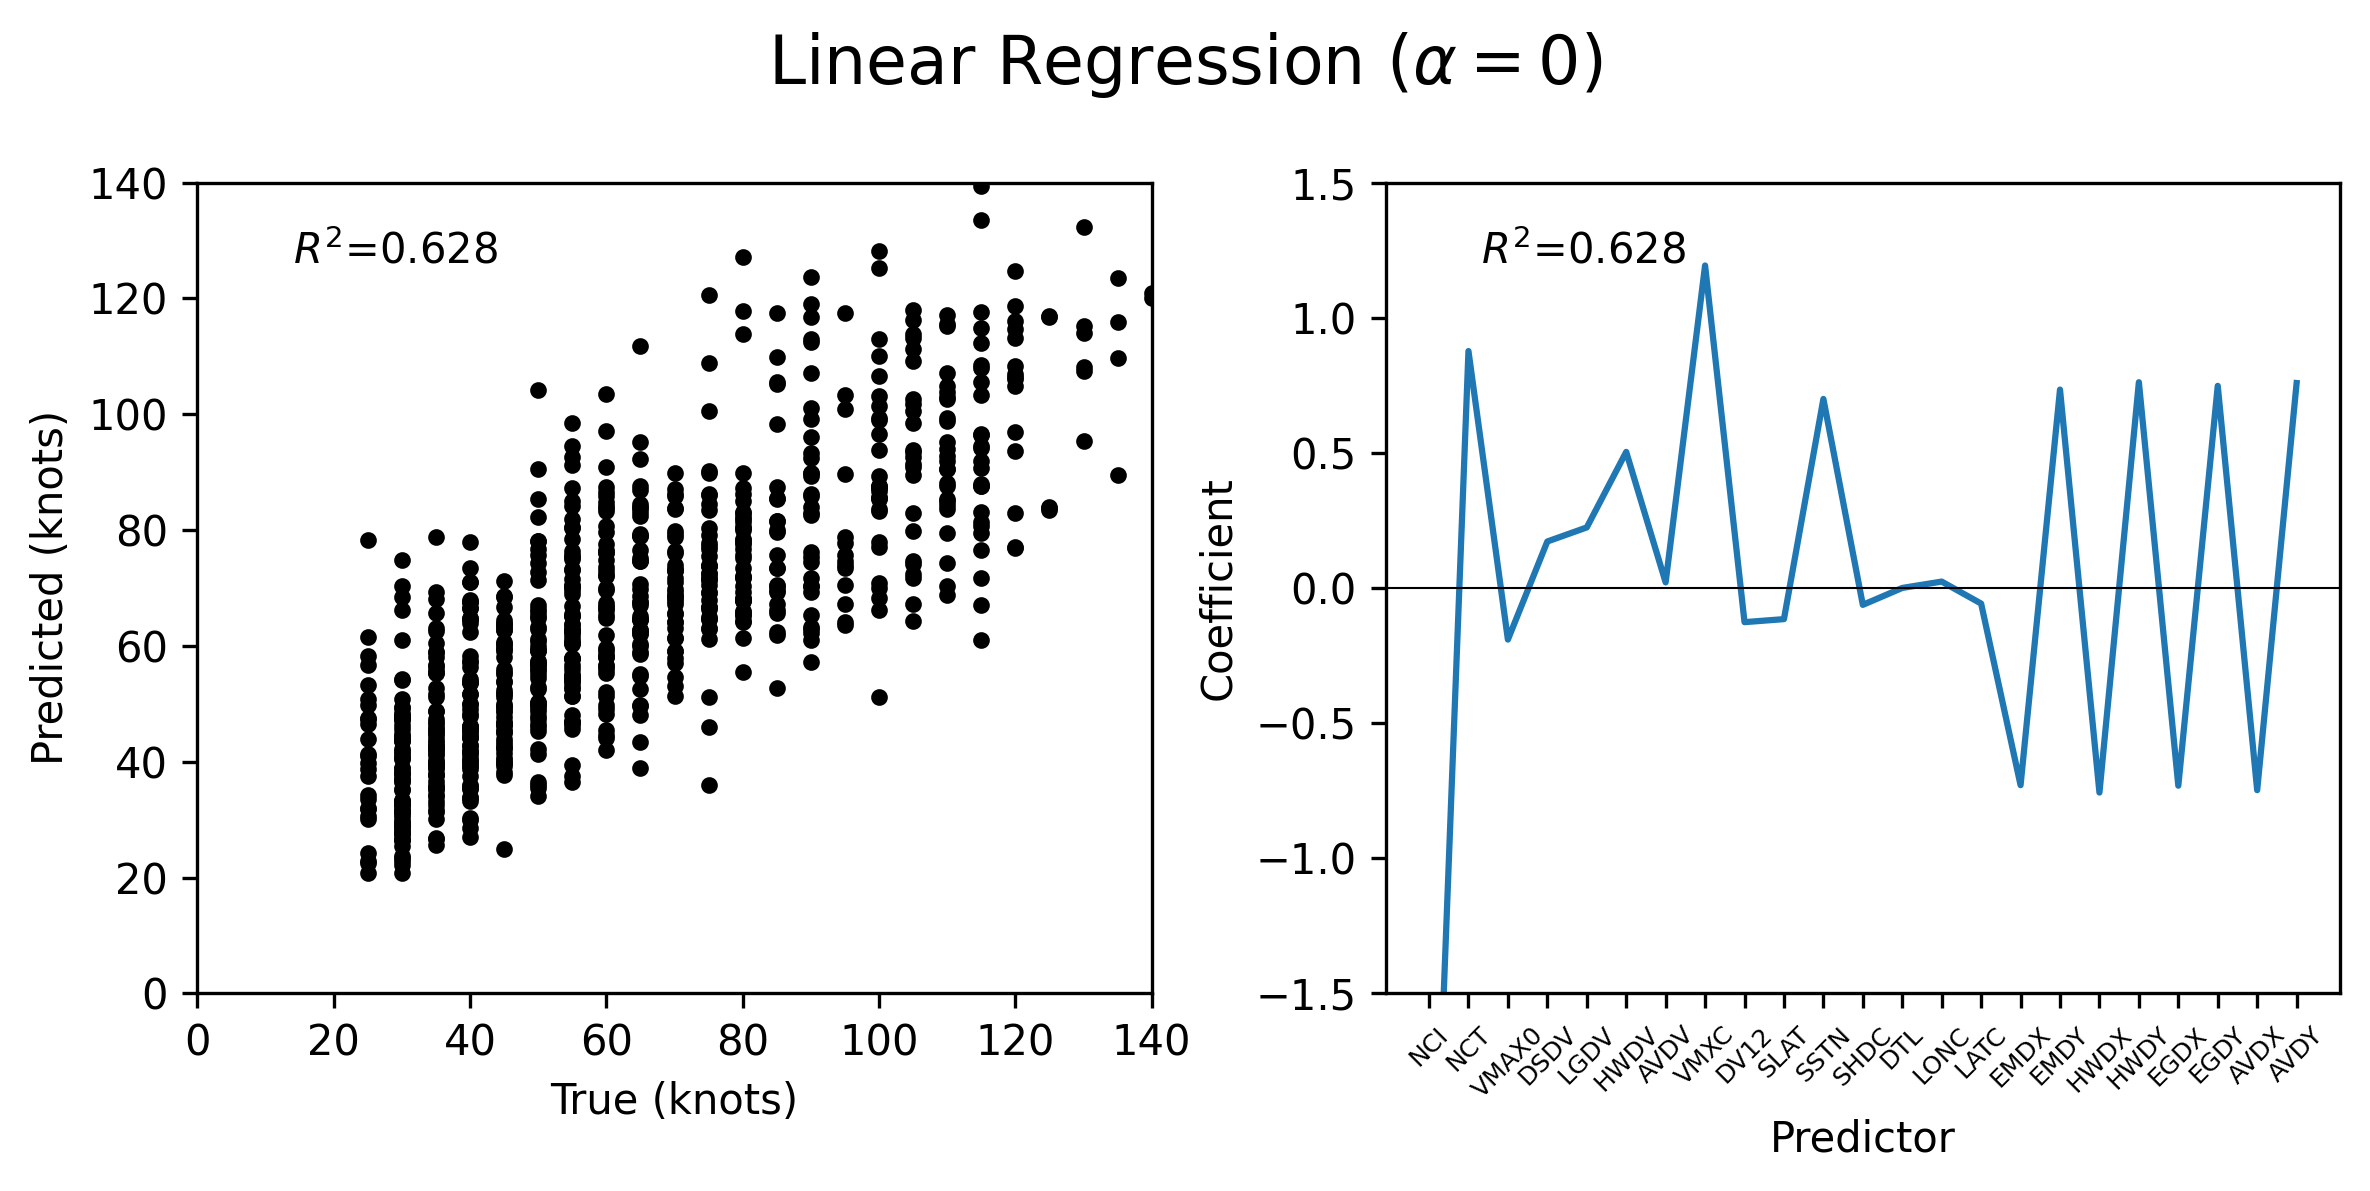

In [53]:
LEADTIME = 48
x_names = [
"NCI","NCT","VMAX0","DSDV","LGDV","HWDV","AVDV","VMXC","DV12","SLAT",
"SSTN","SHDC","DTL","LONC","LATC","EMDX","EMDY","HWDX","HWDY","EGDX",
"EGDY","AVDX","AVDY",]
# ---------------------
datafile_path = "/content/drive/MyDrive/Classes/OA/HW3/hurricane_02-Jun-2022.dat"
df = pd.read_table(datafile_path, sep="\s+")
# print(df.head())
df = df[df["ftime(hr)"] == LEADTIME].reset_index(drop=True)
y = df["VMXC"] + df["OBDV"]
X = df[x_names]

# split into data to use during fitting and data to test
n_fit = int(0.80 * len(y))
X_fit = X[:n_fit]
y_fit = y[:n_fit]
X_test = X[n_fit:]
y_test = y[n_fit:]
# print(f"{len(y_fit) = }, {len(y_test) = }")

# Example of working with sklearn.linear_model.LinearRegression()
# Ordinary Least Squares
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_fit, y_fit)

# Print stats
# print(lin_reg.coef_)
# print(lin_reg.score(X_test, y_test))
# PLOTS
plt.figure(figsize=(8,4), dpi=300)

# Plot predictions vs truth
plt.subplot(1,2,1)
plt.plot(y_test, lin_reg.predict(X_test), '.k')
plt.annotate("$R^2$=" + str(np.round(lin_reg.score(X_test,y_test),4)), xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel("True (knots)")
plt.ylabel("Predicted (knots)")
plt.ylim(0, 140)
plt.xlim(0, 140)

# Plot coefficients
plt.subplot(1,2,2)
plt.plot(lin_reg.coef_)
plt.axhline(y=0, linewidth=0.5, color="k")
plt.xticks(range(len(x_names)), x_names, rotation=45, fontsize=6)

plt.ylim(-1.5, 1.5)
plt.annotate("$R^2$=" + str(np.round(lin_reg.score(X_test,y_test),4)), xy=(0.1, 0.9), xycoords='axes fraction')
plt.xlabel("Predictor")
plt.ylabel("Coefficient")
plt.suptitle("Linear Regression ($\\alpha=0$)", fontsize=16);
plt.tight_layout()
plt.show()
fig.savefig('figx.png')

### (a)

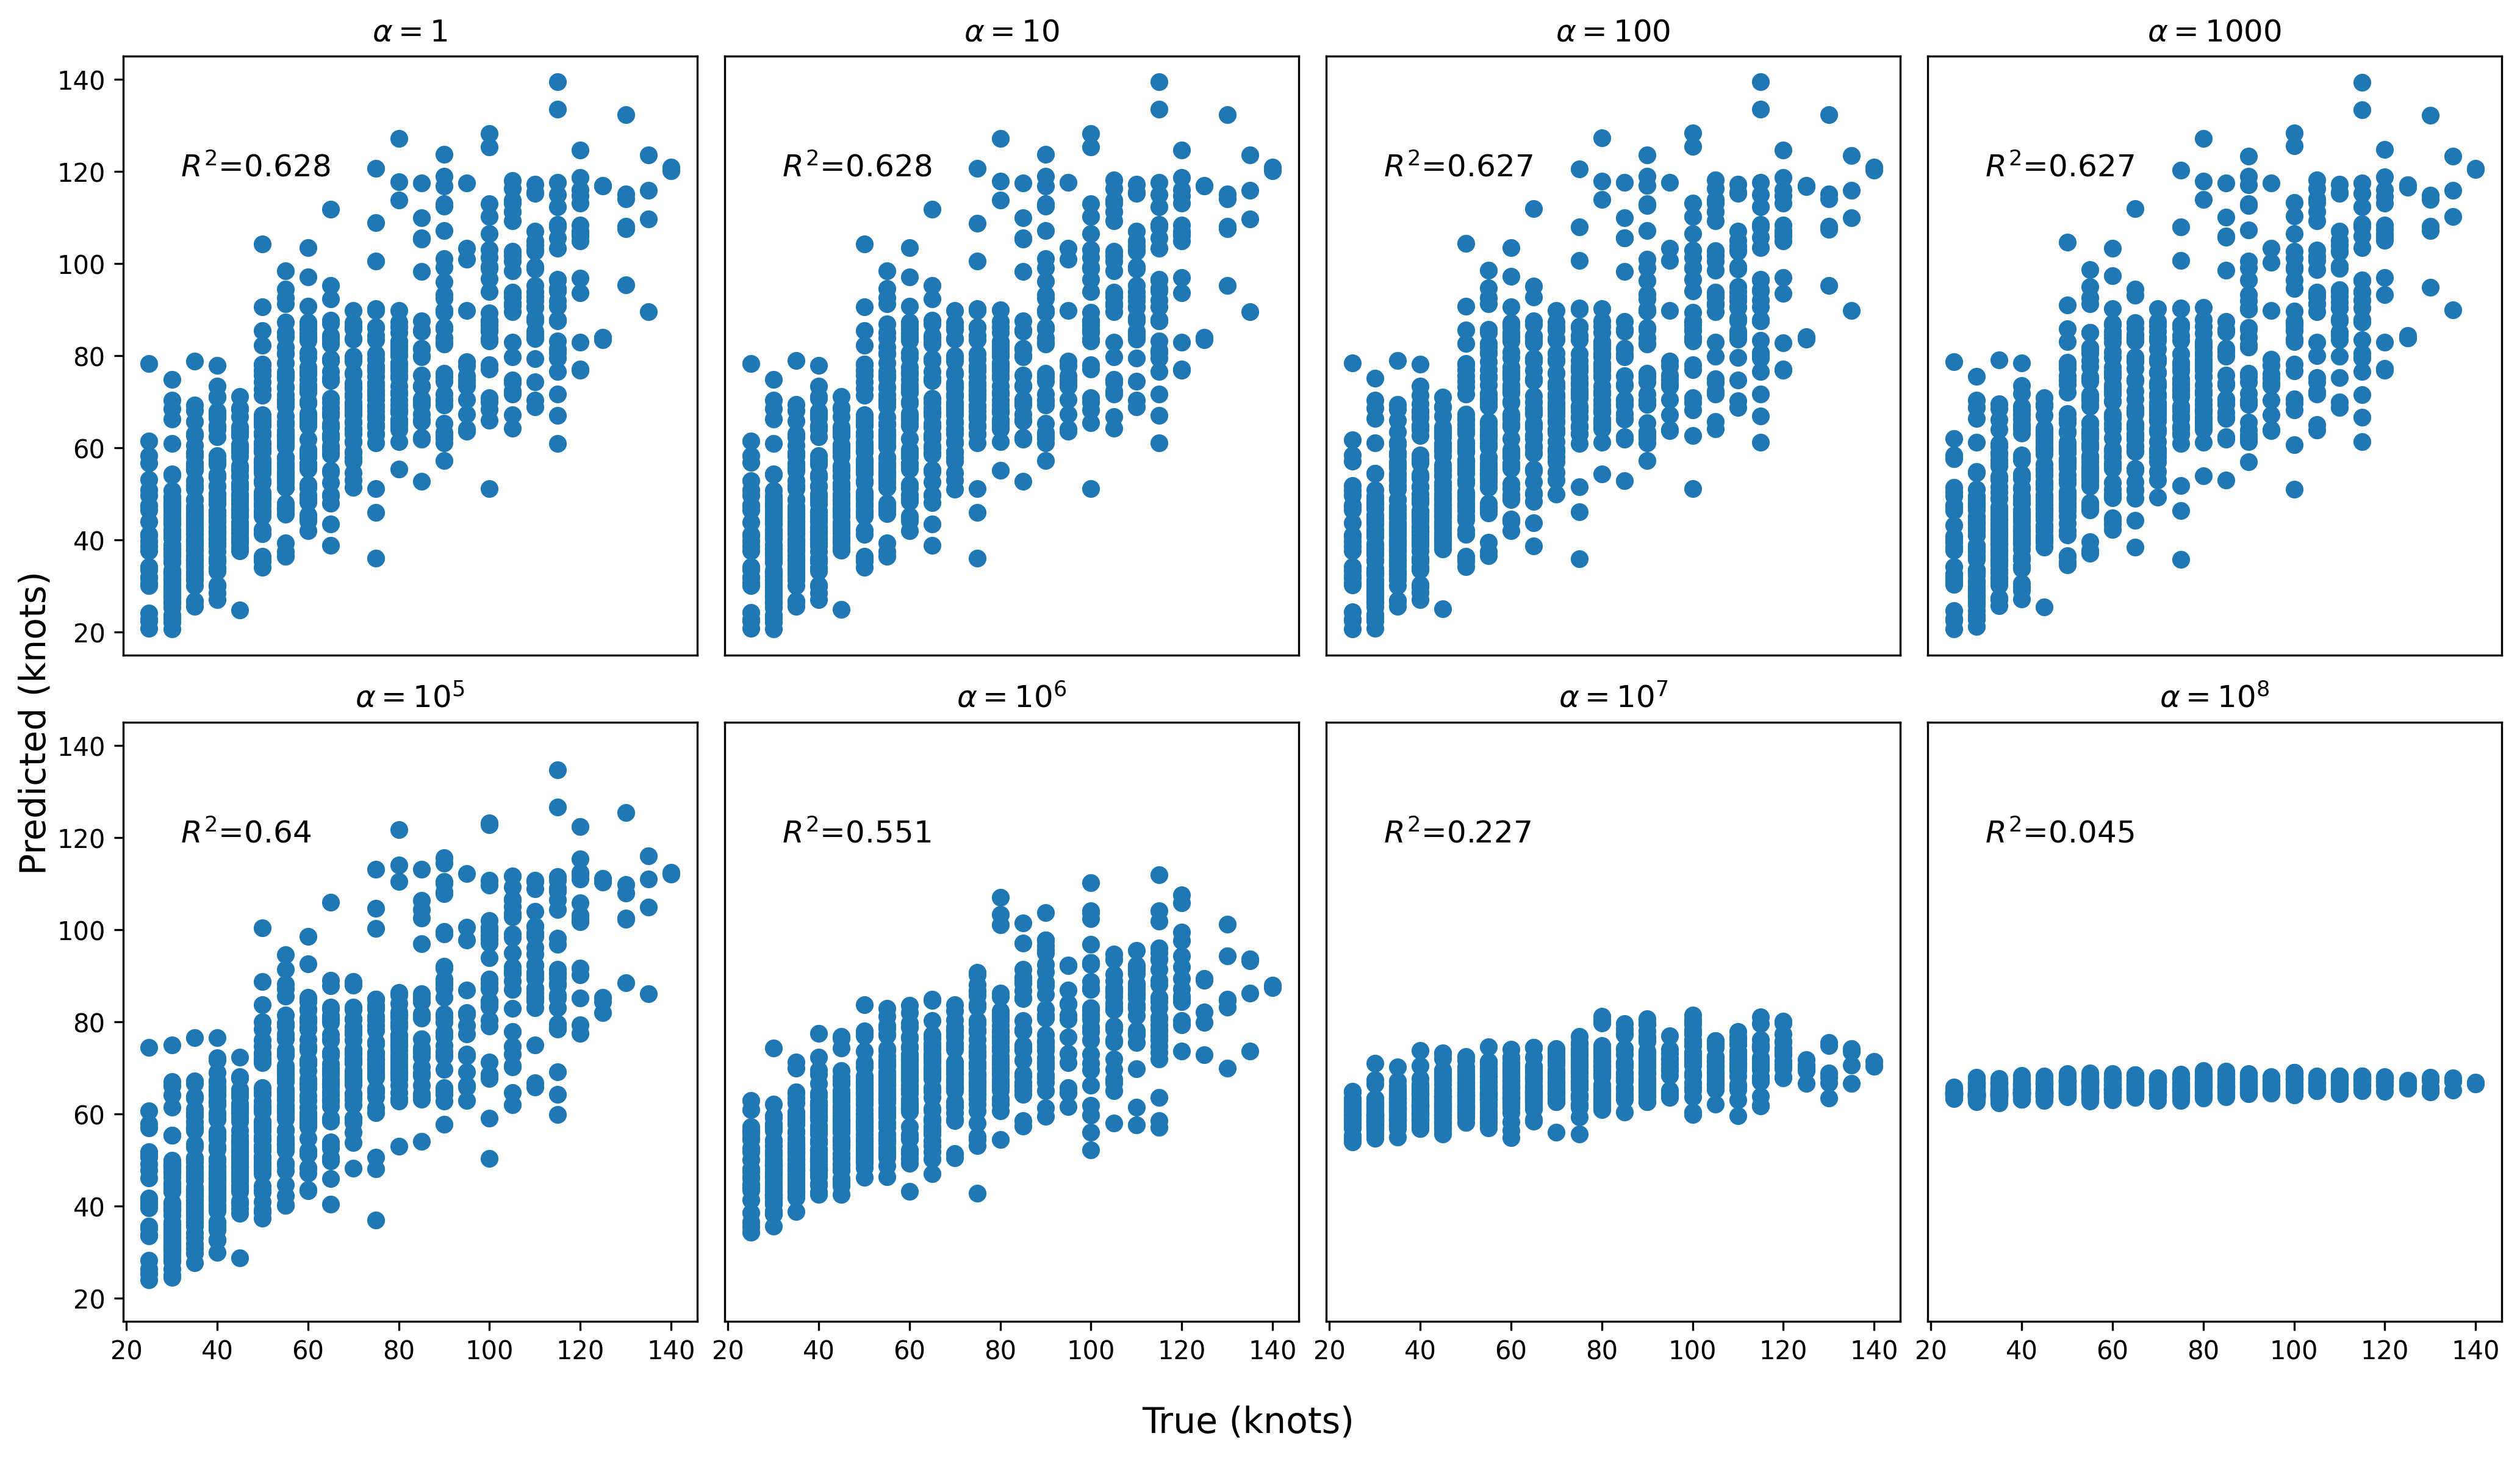

In [39]:
# alphas
alphas = [1, 10, 100, 1000, 1e5, 1e6, 1e7, 1e8]
alpha_names = ["$\\alpha=1$", "$\\alpha=10$", "$\\alpha=100$", "$\\alpha=1000$", "$\\alpha=10^5$", "$\\alpha=10^6$", "$\\alpha=10^7$", "$\\alpha=10^8$"]

# ridge
ridge_coefficients = np.empty((len(alphas), len(x_names)))
ridge_scores = np.empty(len(alphas))

fig, ax = plt.subplots(2, 4, figsize=(14, 8), dpi=300)
for i, alpha in enumerate(alphas):
  ridge = linear_model.Ridge(alpha=alpha, max_iter=1_000_000)
  ridge.fit(X_fit, y_fit)
  y_pred_ridge = ridge.predict(X_test)

  # get coefficients and scores
  ridge_coefficients[i] = ridge.coef_
  ridge_scores[i] = np.round(ridge.score(X_test, y_test), 3)

  # plot knots
  if i < 4:
    ax[i//4, i%4].set_xticks([])

  if i%4 != 0:
    ax[i//4, i%4].set_yticks([])

  ax[i//4, i%4].scatter(y_test, y_pred_ridge)
  ax[i//4, i%4].set_ylim(15, 145)
  ax[i//4, i%4].annotate('$R^2$=' + str(ridge_scores[i]), xy=(0.1, 0.8), xycoords='axes fraction', fontsize=12)
  ax[i//4, i%4].set_title(alpha_names[i], fontsize=12)

fig.supxlabel('True (knots)', fontsize=14)
fig.supylabel('Predicted (knots)', fontsize=14)
# plt.suptitle('Ridge Regression ', fontsize=16);
plt.tight_layout()
fig.savefig('fig8.png')

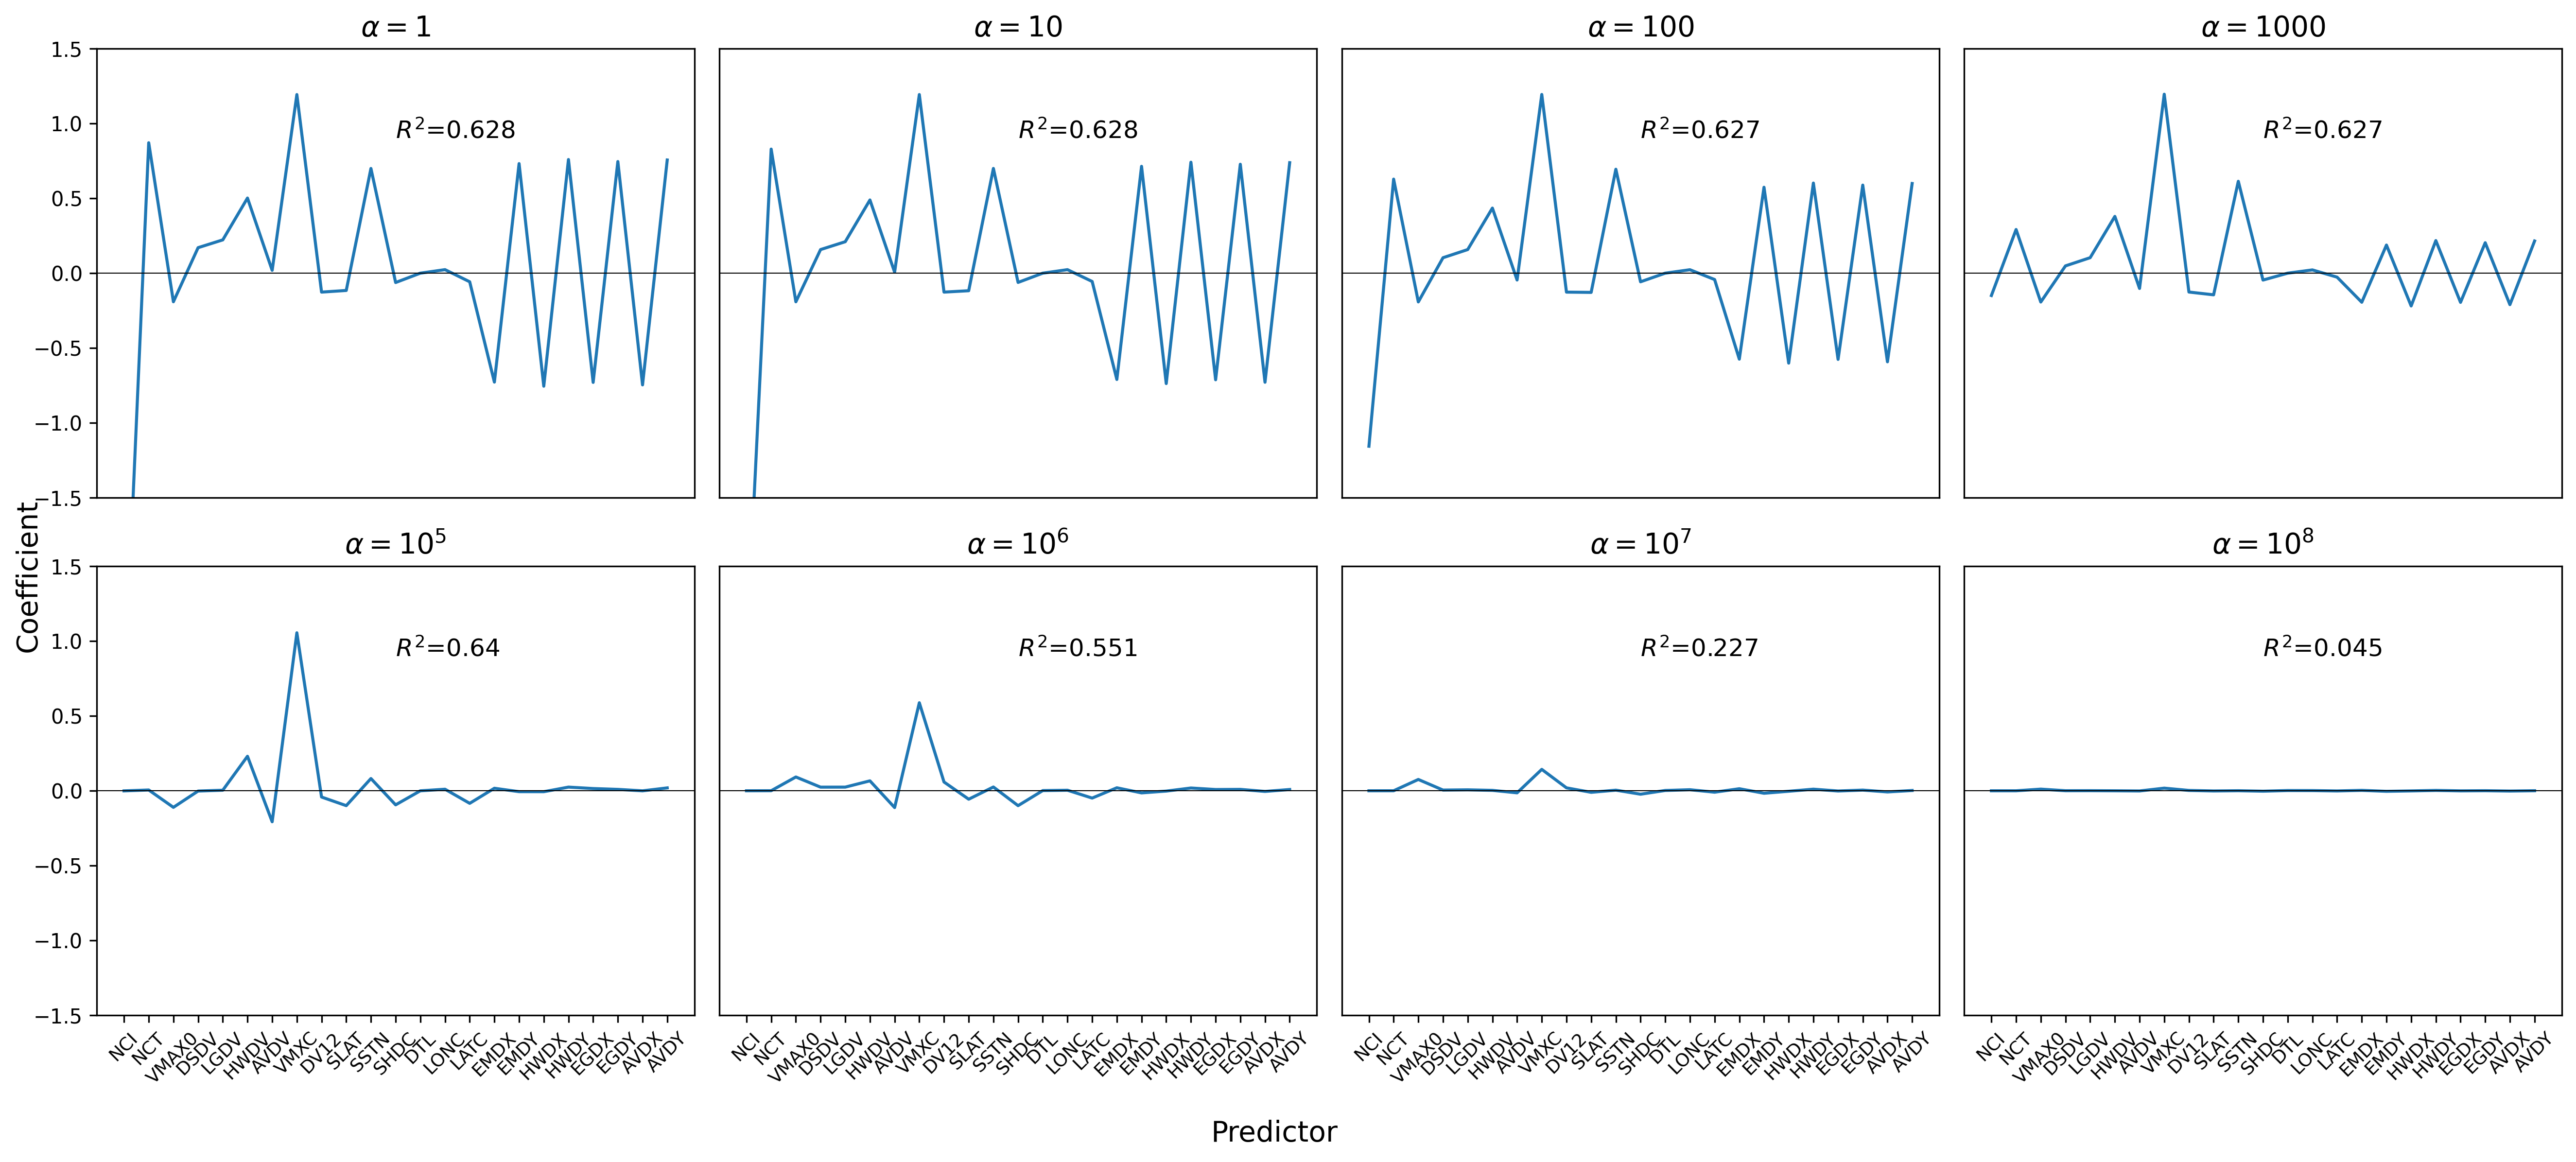

In [45]:
# plot coefficients
fig, ax = plt.subplots(2, 4, figsize=(18, 8), dpi=300)
for i in range(len(alphas)):
  if i < 4:
    ax[i//4, i%4].set_xticks([])
  else:
    ax[i//4, i%4].set_xticks(range(len(x_names)), x_names, rotation=45, fontsize=9)

  if i%4 != 0:
    ax[i//4, i%4].set_yticks([])
  ax[i//4, i%4].set_ylim(-1.5, 1.5)
  ax[i//4, i%4].plot(ridge_coefficients[i])
  ax[i//4, i%4].axhline(y=0, linewidth=0.5, color="k")
  ax[i//4, i%4].annotate('$R^2$=' + str(ridge_scores[i]), xy=(0.5, 0.8), xycoords='axes fraction', fontsize=12)
  ax[i//4, i%4].set_title(alpha_names[i], fontsize=14);

fig.supxlabel('Predictor', fontsize=14)
fig.supylabel('Coefficient', fontsize=14)
# plt.suptitle('Ridge Regression Coefficients', fontsize=16);
plt.tight_layout()
fig.savefig('fig9.png')

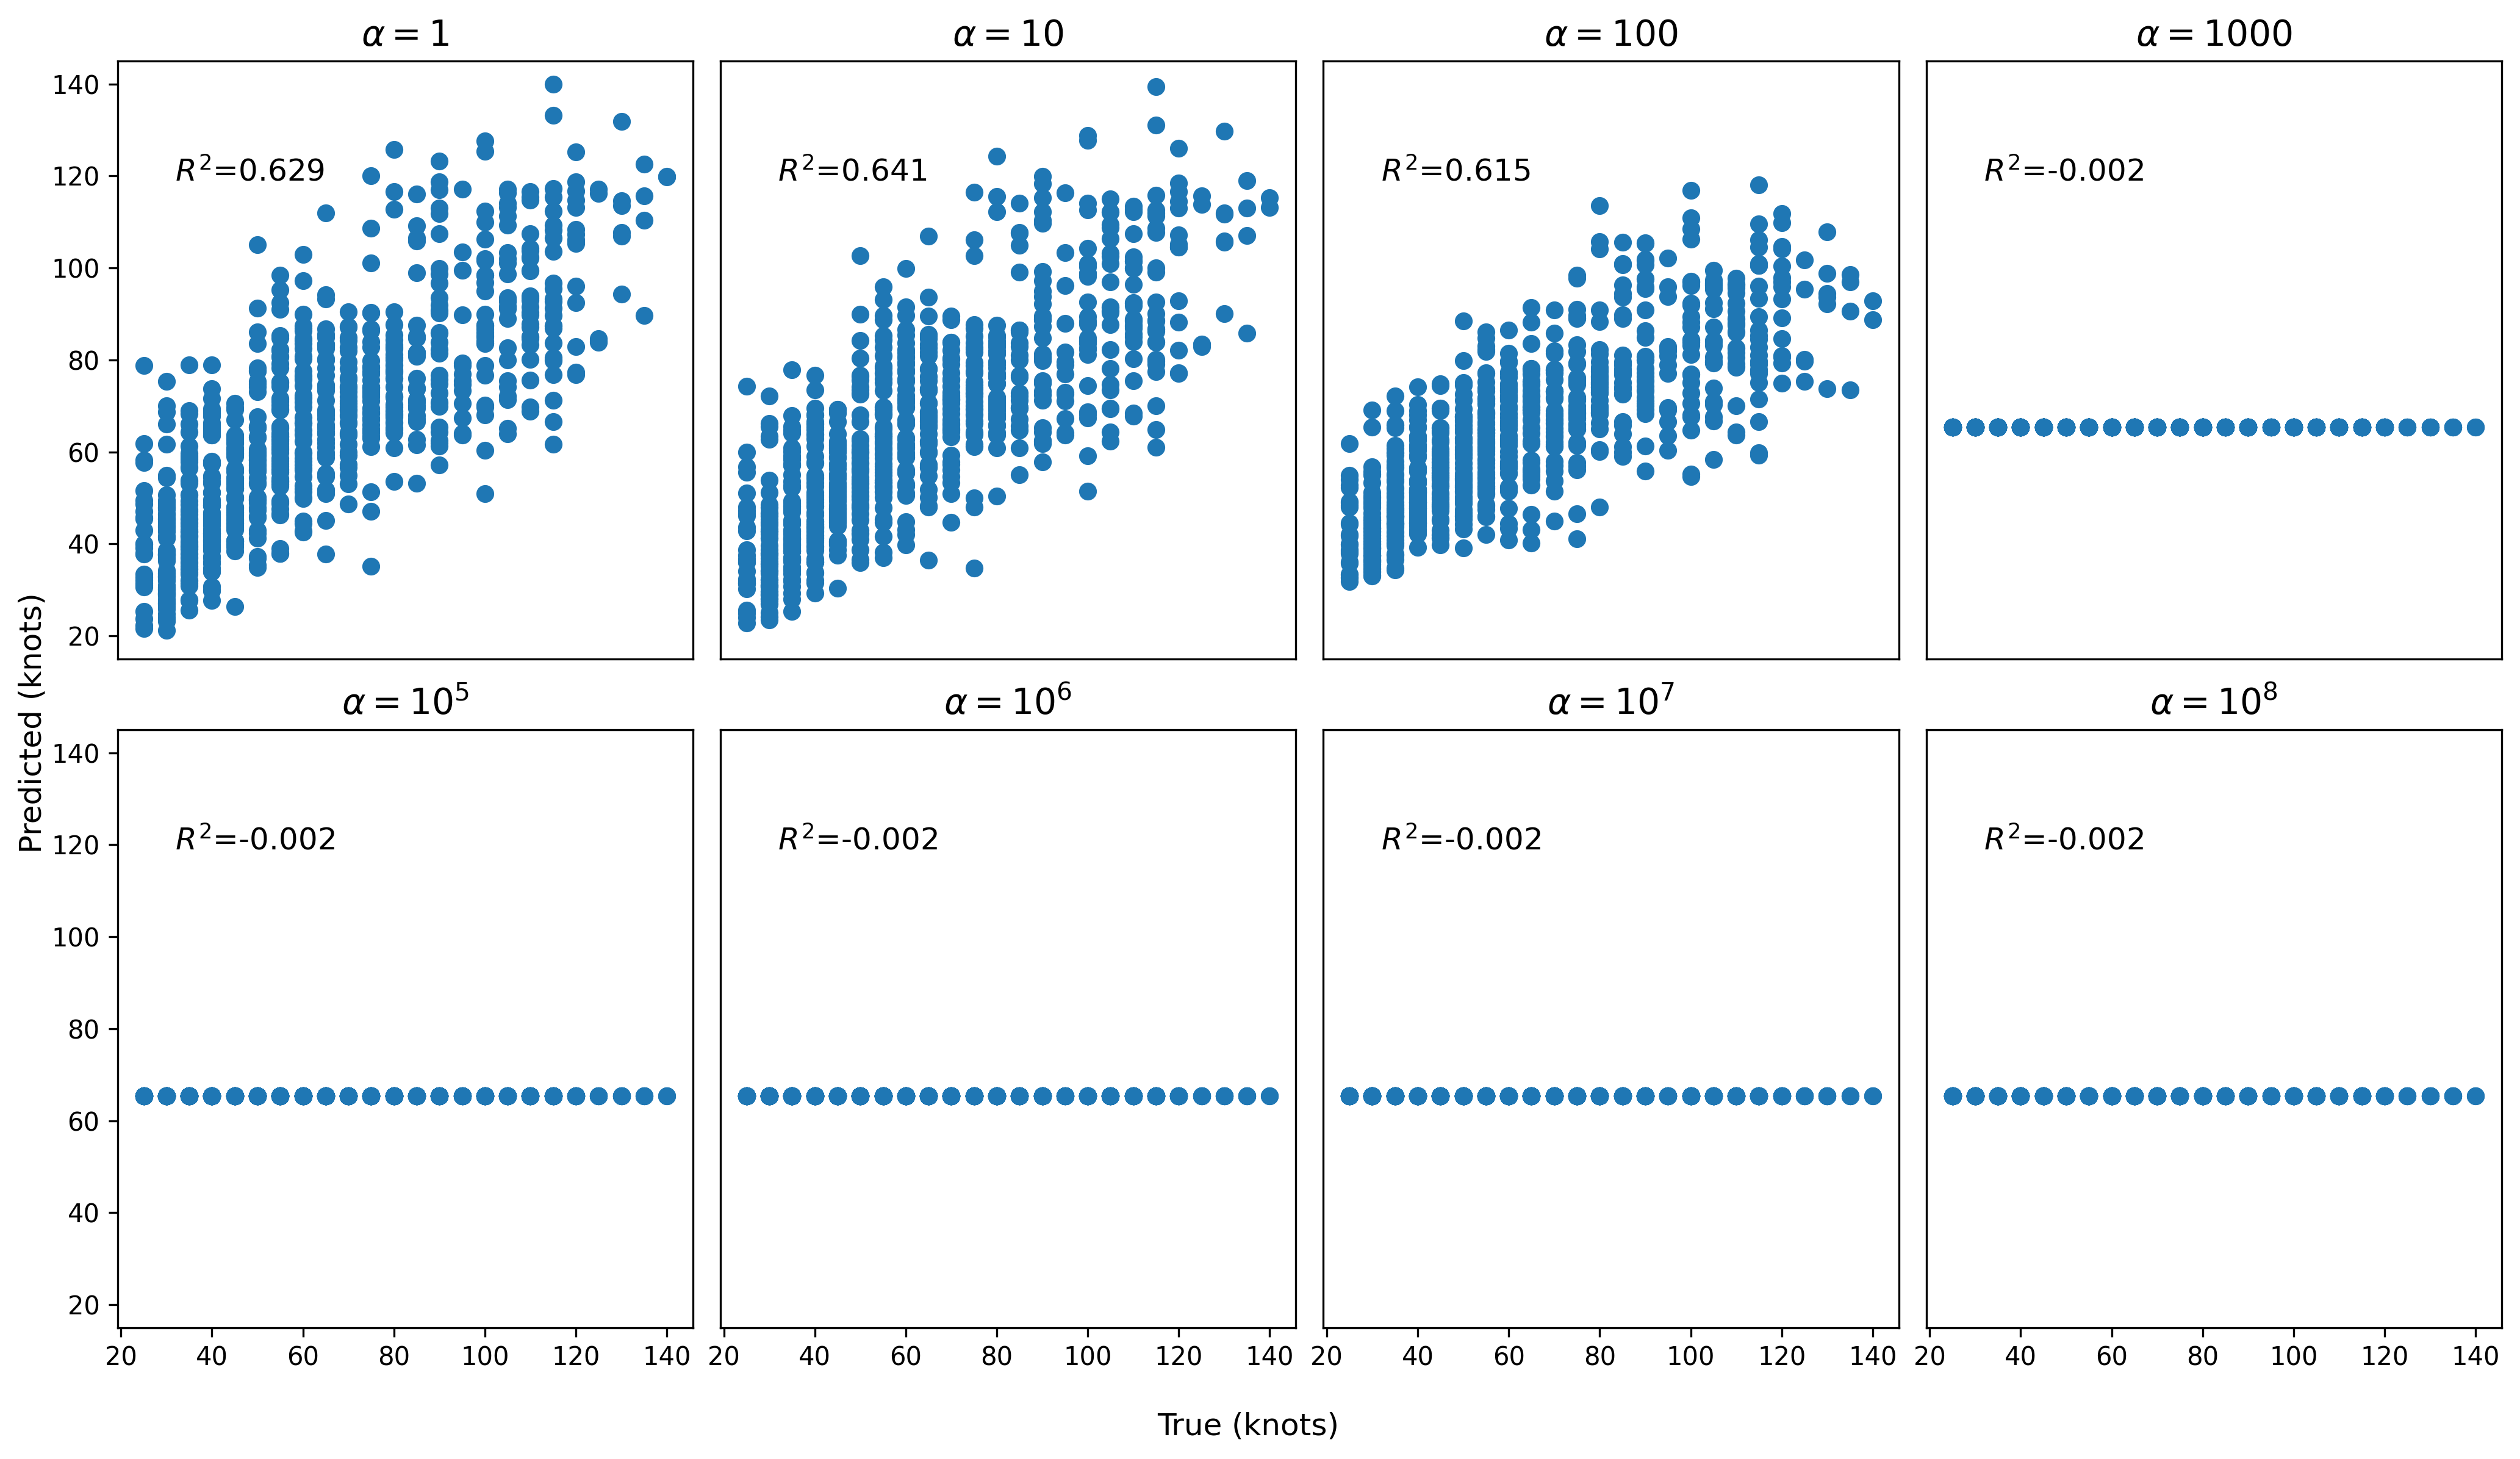

In [47]:
# lasso
lasso_coefficients = np.empty((len(alphas), len(x_names)))
lasso_scores = np.empty(len(alphas))

fig, ax = plt.subplots(2, 4, figsize=(14, 8), dpi=300)

for i, alpha in enumerate(alphas):

  # lasso
  lasso = linear_model.Lasso(alpha=alpha, max_iter=1_000_000)
  lasso.fit(X_fit, y_fit)
  y_pred_lasso = lasso.predict(X_test)

  # get coefficients and scores
  lasso_coefficients[i] = lasso.coef_
  lasso_scores[i] = np.round(lasso.score(X_test, y_test), 3)

  # plot knots
  if i < 4:
    ax[i//4, i%4].set_xticks([])
  if i%4 != 0:
    ax[i//4, i%4].set_yticks([])
  ax[i//4, i%4].scatter(y_test, y_pred_lasso)
  ax[i//4, i%4].set_ylim(15, 145)
  ax[i//4, i%4].annotate('$R^2$=' + str(lasso_scores[i]), xy=(0.1, 0.8), xycoords='axes fraction', fontsize=12)
  ax[i//4, i%4].set_title(alpha_names[i], fontsize=14)

fig.supxlabel('True (knots)', fontsize=12)
fig.supylabel('Predicted (knots)', fontsize=12)
# plt.suptitle('Lasso Regression ', fontsize=16);
plt.tight_layout()
fig.savefig('fig10.png')

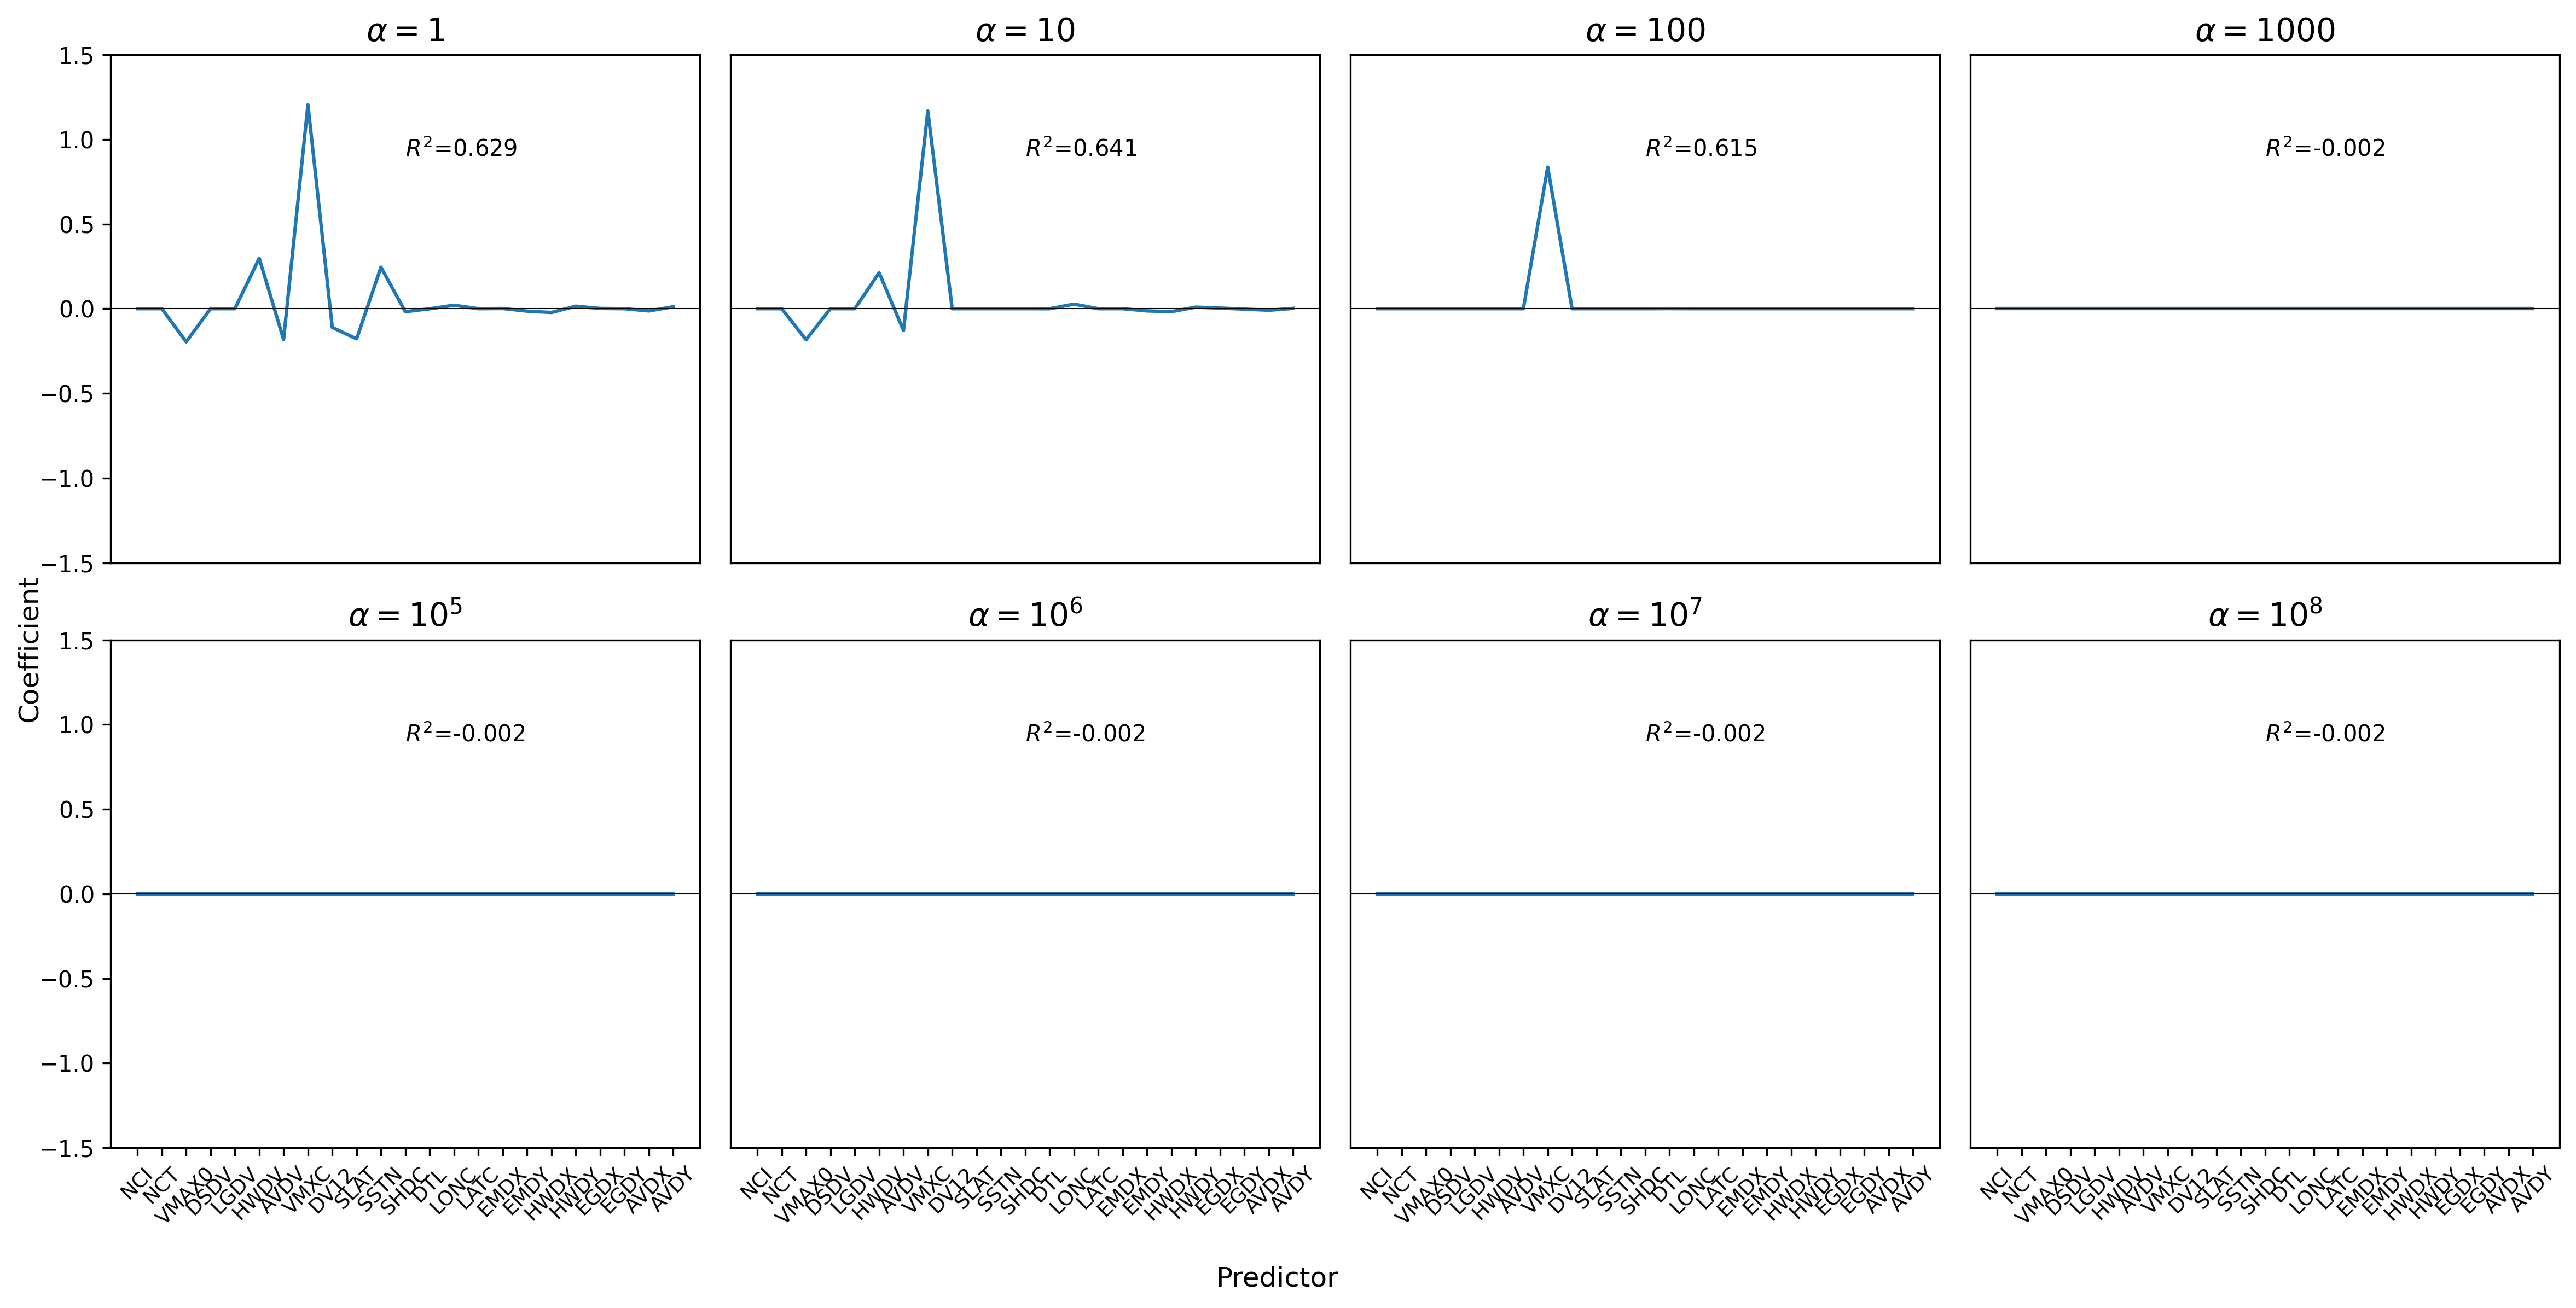

In [51]:
# plot coefficients
fig, ax = plt.subplots(2, 4, figsize=(16, 8), dpi=300)
for i in range(len(alphas)):
  if i < 4:
    ax[i//4, i%4].set_xticks([])
  else:
    ax[i//4, i%4].set_xticks(range(len(x_names)), x_names, rotation=45, fontsize=9)

  if i%4 != 0:
    ax[i//4, i%4].set_yticks([])
  ax[i//4, i%4].set_ylim(-1.5, 1.5)
  ax[i//4, i%4].plot(lasso_coefficients[i])
  ax[i//4, i%4].axhline(y=0, linewidth=0.5, color="k")
  ax[i//4, i%4].annotate('$R^2$=' + str(lasso_scores[i]), xy=(0.5, 0.8), xycoords='axes fraction')
  ax[i//4, i%4].set_title(alpha_names[i], fontsize=14);

fig.supxlabel('Predictor', fontsize=12)
fig.supylabel('Coefficient', fontsize=12)
# plt.suptitle('Lasso Regression Coefficients', fontsize=16);
plt.tight_layout()
fig.savefig('fig11.png')

### (b)

For Figures X and X, I ommited $\alpha=0$ since it's the same as ordinary least squares. In ridge regression, the coefficients of the independent variables decrease as the penalty increases (Figure X). In lasso regression, indepedent variables are eliminated (coefficients=0) as the penalty increases (Figure X). Since lasso eliminates variables it can be used for feature selection.

### (c)

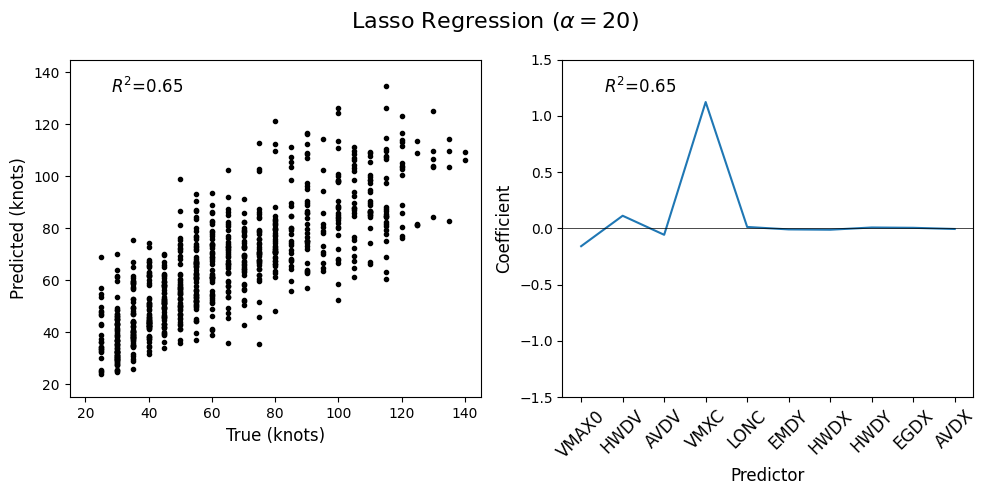

In [50]:
alpha=20
lasso = linear_model.Lasso(alpha=alpha, max_iter=1_000_000)
lasso.fit(X_fit, y_fit)
y_pred_lasso = lasso.predict(X_test)
coefs = lasso.coef_
inds = np.where(np.abs(coefs) > 0)[0]
subnames = []
for i in inds:
 subnames.append(x_names[i])

# Plot predictions vs truth
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(y_test, y_pred_lasso, '.k')
ax[0].annotate("$R^2$=" + str(np.round(lasso.score(X_test,y_test),4)), xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)
ax[0].set_xlabel("True (knots)", fontsize=12)
ax[0].set_ylabel("Predicted (knots)", fontsize=12)
ax[0].set_ylim(15, 145)
ax[0].set_xlim(15, 145)

# Plot coefficients
ax[1].plot(coefs[np.abs(coefs)>0])
ax[1].axhline(y=0, linewidth=0.5, color="k")
ax[1].set_xticks(range(len(subnames)), subnames, rotation=45, fontsize=12)

ax[1].set_ylim(-1.5, 1.5)
ax[1].annotate("$R^2$=" + str(np.round(lasso.score(X_test,y_test),4)), xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)
ax[1].set_xlabel("Predictor", fontsize=12)
ax[1].set_ylabel("Coefficient", fontsize=12)
fig.suptitle("Lasso Regression ($\\alpha=20$)", fontsize=16);
fig.tight_layout();
fig.savefig('fig12.png')

In this case, lasso regression has the best performance under a L1 penalty of $\alpha=10$. With some additional testing, a penalty of $\alpha=20$ is a bit better and eliminates additional independent variables. Figure Y displays the results for lasso regression with the remaining independent variables. The remaining variables are primarily differences between the consensus forecast and the intensity and predicted tracks of certain models. Importantly, the only raw, non-model output variable remaining is the longitude. This indicates hurricanes are not linear in the raw, non model inputs. The models capture the more complicated processes, and in turn, their predictions have a linear relationship to the actual outcome.